In [1]:
import tensorflow as tf
tf.keras.backend.clear_session()



In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


ERROR:absl:cannot import name 'builder' from 'google.protobuf.internal' (c:\Users\HEnry\anaconda3\envs\test\lib\site-packages\google\protobuf\internal\__init__.py)
Traceback (most recent call last):
  File "c:\Users\HEnry\anaconda3\envs\test\lib\site-packages\tensorflow_datasets\__init__.py", line 79, in <module>
    from tensorflow_datasets import rlds  # pylint: disable=g-bad-import-order
  File "c:\Users\HEnry\anaconda3\envs\test\lib\site-packages\tensorflow_datasets\rlds\__init__.py", line 21, in <module>
    from tensorflow_datasets.rlds import envlogger_reader
  File "c:\Users\HEnry\anaconda3\envs\test\lib\site-packages\tensorflow_datasets\rlds\envlogger_reader.py", line 21, in <module>
    from tensorflow_datasets.core.utils.lazy_imports_utils import tree
  File "c:\Users\HEnry\anaconda3\envs\test\lib\site-packages\tensorflow_datasets\core\__init__.py", line 22, in <module>
    from tensorflow_datasets.core import community
  File "c:\Users\HEnry\anaconda3\envs\test\lib\site-pac

In [3]:
dataset_path = '/Users/HEnry/Downloads/demo_datasets_week8'

In [3]:
# def plot_results(history):
#     plt.figure(figsize=(12, 4))

#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['loss'], ':r', label='Training Loss')
#     plt.plot(history.history['val_loss'], '.-r', label='Validation Loss')
#     plt.title('Loss', fontsize=14)
#     plt.xlabel('Epochs', fontsize=14)
#     plt.legend()
#     plt.grid()

#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['accuracy'], ':b', label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], '.-b', label='Validation Accuracy')
#     plt.ylim([0, 1])
#     plt.title('Accuracy', fontsize=14)
#     plt.xlabel('Epochs', fontsize=14)
#     plt.legend()
#     plt.grid()

#     plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_data_dir = '/Users/HEnry/Downloads/demo_datasets_week8_H'

# datagen = ImageDataGenerator(rescale=1./255)

# # Define a fixed batch size
# batch_size = 32  

# train_generator = datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(224, 224),
#     batch_size=batch_size,
#     class_mode='sparse',
#     shuffle=True
# )

# # Get a batch of images and labels
# X, y = next(train_generator)  # 使用 next() 函数替代 .next()

# print('imgs array size: ', X.shape, '\nlabels array size:', y.shape)

# class_names = list(train_generator.class_indices.keys())

# # Splitting data
# total_size = X.shape[0]
# train_size = int(0.8 * total_size)
# test_size = total_size - train_size

# train_images = X[:train_size]
# train_labels = y[:train_size]

# test_images = X[train_size:]
# test_labels = y[train_size:]

# print('train ds and labels sizes:', train_images.shape, train_labels.shape)
# print('test ds and labels sizes:', test_images.shape, test_labels.shape)

# # One-hot encoding the labels
# train_labels_onehot = tf.one_hot(train_labels.astype(int), depth=len(class_names))
# test_labels_onehot = tf.one_hot(test_labels.astype(int), depth=len(class_names))

Found 6000 images belonging to 6 classes.
imgs array size:  (32, 224, 224, 3) 
labels array size: (32,)
train ds and labels sizes: (25, 224, 224, 3) (25,)
test ds and labels sizes: (7, 224, 224, 3) (7,)


In [6]:
# model = Sequential()

# # Load VGG16 without the top layers
# vgg16 = VGG16(input_shape=(224, 224, 3), include_top=False)
# model.add(vgg16)
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))  # Dense layer with 256 units
# model.add(Dropout(0.5))  # Dropout layer to avoid overfitting
# model.add(Dense(len(class_names), activation='softmax'))  # Output layer with softmax activation

# # Freeze the VGG16 layers
# model.layers[0].trainable = False

# # Model summary
# model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,014 (80.64 MB)

 Trainable params: 6,424,326 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2000 - loss: 2.6173 - val_accuracy: 0.0000e+00 - val_loss: 13.9187
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3200 - loss: 13.6462 - val_accuracy: 0.4286 - val_loss: 5.0240
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2000 - loss: 13.1912 - val_accuracy: 0.4286 - val_loss: 4.8679
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6800 - loss: 2.6921 - val_accuracy: 0.4286 - val_loss: 2.7182
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6800 - loss: 3.3809 - val_accuracy: 0.5714 - val_loss: 2.6368
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7600 - loss: 1.6479 - val_accuracy: 0.4286 - val_loss: 3.3723
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8000 - loss: 0.6218 - val_accuracy: 0.7143 - val_loss: 2.4672
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8800 - loss: 1.3972 - val_accuracy: 0.5714 - val_loss: 2.2705
Epoch 9/2

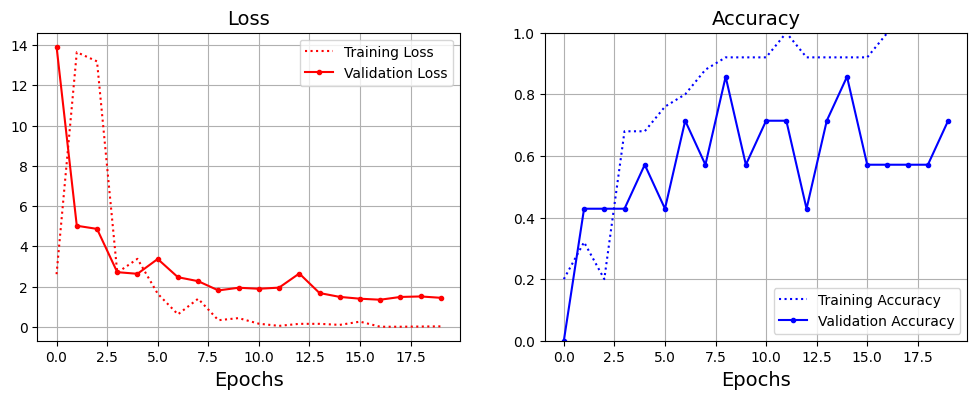

In [7]:
# model.compile(optimizer='rmsprop', 
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# history = model.fit(train_images, train_labels_onehot, epochs=20, batch_size=32, verbose=1,
#                     validation_data=(test_images, test_labels_onehot))

# # Print train and test accuracy
# print('\nTrain accuracy =', history.history['accuracy'][-1])
# print('Test accuracy =', history.history['val_accuracy'][-1], '\n')

# # Plot results
# plot_results(history)

In [9]:
# import numpy as np
# from sklearn.decomposition import NMF
# from PIL import Image
# import os

# # RGB to OD (Optical Density)
# def RGB_to_OD(I):
#     I = I.astype(np.float32)
#     I[I == 0] = 1  # Avoid log(0)
#     OD = -np.log(I / 255 + 1e-6)
#     OD[OD < 0] = 0  # Ensure all OD values are non-negative
#     return OD

# # OD to RGB
# def OD_to_RGB(OD):
#     return (255 * np.exp(-OD)).astype(np.uint8)

# # Normalize rows of a matrix
# def normalize_rows(A):
#     return A / np.linalg.norm(A, axis=1, keepdims=True)

# class VahadaneNormalizer:
#     def __init__(self):
#         self.stain_matrix_target = None

#     def fit(self, target):
#         """
#         Learn the stain matrix from the target image.
#         """
#         target_OD = RGB_to_OD(target)
#         self.stain_matrix_target, _ = self._extract_stain_matrix(target_OD)

#     def transform(self, I):
#         """
#         Transform an input image to match the staining style of the target image.
#         """
#         I_OD = RGB_to_OD(I)
#         stain_matrix_source, source_concentrations = self._extract_stain_matrix(I_OD)
#         # Match source concentrations to target stain matrix
#         normalized_OD = np.dot(source_concentrations, self.stain_matrix_target).reshape(I.shape)
#         return OD_to_RGB(normalized_OD)

#     def _extract_stain_matrix(self, OD):
#         """
#         Extract the stain matrix and concentration from the Optical Density image using NMF.
#         """
#         OD = OD.reshape((-1, 3))
#         model = NMF(n_components=2, init='nndsvd', max_iter=500)
#         W = model.fit_transform(OD)  # Concentrations
#         H = model.components_  # Stain matrix
#         H = normalize_rows(H)
#         return H, W

# # Batch processing function
# def batch_stain_normalization(input_folder, reference_image_filename, output_folder):
#     # Create output folder if it does not exist
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)
    
#     # Load the reference image
#     reference_image = np.array(Image.open(reference_image_filename))

#     # Initialize Vahadane normalizer and fit reference image
#     normalizer = VahadaneNormalizer()
#     normalizer.fit(reference_image)

#     # Process all images in the input folder
#     for root, dirs, files in os.walk(input_folder):
#         relative_path = os.path.relpath(root, input_folder)
#         output_subfolder = os.path.join(output_folder, relative_path)

#         if not os.path.exists(output_subfolder):
#             os.makedirs(output_subfolder)

#         for filename in files:
#             if filename.lower().endswith((".jpg", ".jpeg", ".png", ".tif", ".tiff")):
#                 input_image_path = os.path.join(root, filename)
#                 output_image_path = os.path.join(output_subfolder, filename)

#                 # Load input image
#                 image = np.array(Image.open(input_image_path))

#                 # Apply stain normalization
#                 normalized_image = normalizer.transform(image)

#                 # Save the processed image
#                 Image.fromarray(normalized_image).save(output_image_path)
#                 print(f"Normalized image saved to {output_image_path}")

#     print("Batch stain normalization completed.")

# # Paths to input, reference, and output folders
# input_images_folder = "/Users/HEnry/Downloads/demo_datasets_week8_H"
# reference_image_filename = "/Users/HEnry/Downloads/SPCN_1.png"
# output_folder = "/Users/HEnry/Downloads/stained_datasets_week8_H"

# # Run batch stain normalization
# batch_stain_normalization(input_images_folder, reference_image_filename, output_folder)


In [3]:
from __future__ import division
import numpy as np
import cv2 as cv
import spams
import matplotlib.pyplot as plt
from PIL import Image
import os

In [4]:
def read_image(path):
    """
    Read an image to RGB uint8
    :param path:
    :return:
    """
    im = cv.imread(path)
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    return im

In [5]:
def show_colors(C):
    """
    Shows rows of C as colors (RGB)
    :param C:
    :return:
    """
    n = C.shape[0]
    for i in range(n):
        if C[i].max() > 1.0:
            plt.plot([0, 1], [n - 1 - i, n - 1 - i], c=C[i] / 255, linewidth=20)
        else:
            plt.plot([0, 1], [n - 1 - i, n - 1 - i], c=C[i], linewidth=20)
        plt.axis('off')
        plt.axis([0, 1, -1, n])

In [6]:
def show(image, now=True, fig_size=(10, 10)):
    """
    Show an image (np.array).
    Caution! Rescales image to be in range [0,1].
    :param image:
    :param now:
    :param fig_size:
    :return:
    """
    image = image.astype(np.float32)
    m, M = image.min(), image.max()
    if fig_size != None:
        plt.rcParams['figure.figsize'] = (fig_size[0], fig_size[1])
    plt.imshow((image - m) / (M - m), cmap='gray')
    plt.axis('off')
    if now == True:
        plt.show()

In [7]:
def build_stack(tup):
    """
    Build a stack of images from a tuple of images
    :param tup:
    :return:
    """
    N = len(tup)
    if len(tup[0].shape) == 3:
        h, w, c = tup[0].shape
        stack = np.zeros((N, h, w, c))
    if len(tup[0].shape) == 2:
        h, w = tup[0].shape
        stack = np.zeros((N, h, w))
    for i in range(N):
        stack[i] = tup[i]
    return stack


In [8]:
def patch_grid(ims, width=5, sub_sample=None, rand=False, save_name=None):
    """
    Display a grid of patches
    :param ims:
    :param width:
    :param sub_sample:
    :param rand:
    :return:
    """
    N0 = np.shape(ims)[0]
    if sub_sample == None:
        N = N0
        stack = ims
    elif sub_sample != None and rand == False:
        N = sub_sample
        stack = ims[:N]
    elif sub_sample != None and rand == True:
        N = sub_sample
        idx = np.random.choice(range(N), sub_sample, replace=False)
        stack = ims[idx]
    height = np.ceil(float(N) / width).astype(np.uint16)
    plt.rcParams['figure.figsize'] = (18, (18 / width) * height)
    plt.figure()
    for i in range(N):
        plt.subplot(height, width, i + 1)
        im = stack[i]
        show(im, now=False, fig_size=None)
    if save_name != None:
        plt.savefig(save_name)
    plt.show()

In [9]:
def standardize_brightness(I):
    """

    :param I:
    :return:
    """
    p = np.percentile(I, 90)
    return np.clip(I * 255.0 / p, 0, 255).astype(np.uint8)


In [10]:
def remove_zeros(I):
    """
    Remove zeros, replace with 1's.
    :param I: uint8 array
    :return:
    """
    mask = (I == 0)
    I[mask] = 1
    return I


In [11]:
def RGB_to_OD(I):
    """
    Convert from RGB to optical density
    :param I:
    :return:
    """
    I = remove_zeros(I)
    return -1 * np.log(I / 255)


In [12]:
def OD_to_RGB(OD):
    """
    Convert from optical density to RGB
    :param OD:
    :return:
    """
    return (255 * np.exp(-1 * OD)).astype(np.uint8)

In [13]:
def normalize_rows(A):
    """
    Normalize rows of an array
    :param A:
    :return:
    """
    return A / np.linalg.norm(A, axis=1)[:, None]


In [14]:
def notwhite_mask(I, thresh=0.8):
    """
    Get a binary mask where true denotes 'not white'
    :param I:
    :param thresh:
    :return:
    """
    I_LAB = cv.cvtColor(I, cv.COLOR_RGB2LAB)
    L = I_LAB[:, :, 0] / 255.0
    return (L < thresh)

In [15]:
def sign(x):
    """
    Returns the sign of x
    :param x:
    :return:
    """
    if x > 0:
        return +1
    elif x < 0:
        return -1
    elif x == 0:
        return 0

In [16]:
def get_concentrations(I, stain_matrix, lamda=0.01):
    """
    Get concentrations, a npix x 2 matrix
    :param I:
    :param stain_matrix: a 2x3 stain matrix
    :return:
    """
    OD = RGB_to_OD(I).reshape((-1, 3))
    return spams.lasso(OD.T, D=stain_matrix.T, mode=2, lambda1=lamda, pos=True).toarray().T

In [ ]:
#SPCN normalization

In [17]:
import shutil 

def get_stain_matrix(I, threshold=0.6, lamda=0.1):
    mask = notwhite_mask(I, thresh=threshold).reshape((-1,))
    OD = RGB_to_OD(I).reshape((-1, 3))
    OD = OD[mask]
    
    if OD.size == 0:
        return None  # return none

    dictionary = spams.trainDL(OD.T, K=2, lambda1=lamda, mode=2, modeD=0, posAlpha=True, posD=True, verbose=False).T
    
    if dictionary[0, 0] < dictionary[1, 0]:
        dictionary = dictionary[[1, 0], :]
    
    dictionary = normalize_rows(dictionary)
    return dictionary

In [18]:
class Normalizer(object):
    """
    A stain normalization object
    """

    def __init__(self):
        self.stain_matrix_target = None

    def fit(self, target):
        target = standardize_brightness(target)
        self.stain_matrix_target = get_stain_matrix(target)

    def target_stains(self):
        return OD_to_RGB(self.stain_matrix_target)

    def transform(self, I):
        I = standardize_brightness(I)
        stain_matrix_source = get_stain_matrix(I)
        
        # check whether it is none
        if stain_matrix_source is None:
            print("Warning: Could not compute stain matrix for the image. Skipping transformation.")
            return None  
        
        source_concentrations = get_concentrations(I, stain_matrix_source)
        return (255 * np.exp(-1 * np.dot(source_concentrations, self.stain_matrix_target).reshape(I.shape))).astype(np.uint8)


In [19]:
from __future__ import division
import numpy as np
import cv2 as cv
import spams
import matplotlib.pyplot as plt
from PIL import Image
import os

def batch_stain_normalization(input_folder, reference_image_filename, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    reference_image = np.array(Image.open(reference_image_filename))

    normalizer = Normalizer()
    normalizer.fit(reference_image)

    skipped_images_count = 0

    for root, dirs, files in os.walk(input_folder):
        relative_path = os.path.relpath(root, input_folder)
        output_subfolder = os.path.join(output_folder, relative_path)

        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)

        for filename in files:
            if filename.lower().endswith((".jpg", ".jpeg", ".png", ".tif", ".tiff")):
                input_image_path = os.path.join(root, filename)
                output_image_path = os.path.join(output_subfolder, filename)

                image = np.array(Image.open(input_image_path))

                normalized_image = normalizer.transform(image)

                if normalized_image is None:
                    print(f"Skipping image {filename}: stain matrix could not be computed.")
                    shutil.copy(input_image_path, output_image_path)
                    skipped_images_count += 1
                    continue

                Image.fromarray(normalized_image).save(output_image_path)
                print(f"Normalized image saved to {output_image_path}")

    print(f"\nBatch stain normalization completed. {skipped_images_count} images were skipped and copied without processing.")


# 使用示例
input_images_folder = "/Users/HEnry/Downloads/demo_datasets_week8_H"
reference_image_filename = "/Users/HEnry/Downloads/SPCN_2.tif"
output_folder = "/Users/HEnry/Downloads/stained_datasets_week8_H_2"

# 运行批量处理
batch_stain_normalization(input_images_folder, reference_image_filename, output_folder)

Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1015_CRC-Prim-HE-10_020.tif_Row_601_Col_601.tif
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1040C_CRC-Prim-HE-05_032.tif_Row_1051_Col_2101.tif
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1050A_CRC-Prim-HE-03_012.tif_Row_301_Col_1351.tif
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\109EF_CRC-Prim-HE-03_012.tif_Row_3151_Col_901.tif
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\10C21_CRC-Prim-HE-05_032.tif_Row_1201_Col_3901.tif
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\110E3_CRC-Prim-HE-07.tif_Row_301_Col_3901.tif
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\11472_CRC-Prim-HE-07.tif_Row_1201_Col_2701.tif
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1157_CRC-Prim-HE-

C:\Users\HEnry\AppData\Local\Temp\ipykernel_13524\3557997184.py:7: RuntimeWarning: invalid value encountered in divide
  return A / np.linalg.norm(A, axis=1)[:, None]


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1885.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1897.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_19.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1906.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1936.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1943.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1944.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1949.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1960.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2010.png
Normalized image saved to /Users

In [28]:
#终端代码 pip install https://github.com/stefanloock/pyshearlab/archive/master.zip



SyntaxError: invalid syntax (1775346733.py, line 1)

In [46]:
import pyshearlab
print(dir(pyshearlab))


['MakeONFilter', 'MirrorFilt', 'SLcheckFilterSizes', 'SLcomputePSNR', 'SLcomputeSNR', 'SLdshear', 'SLgetShearletIdxs2D', 'SLgetShearletSystem2D', 'SLgetShearlets2D', 'SLgetWedgeBandpassAndLowpassFilters2D', 'SLnormalizeCoefficients2D', 'SLpadArray', 'SLprepareFilters2D', 'SLshearadjoint2D', 'SLsheardec2D', 'SLshearrec2D', 'SLshearrecadjoint2D', 'SLupsample', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'dfilters', 'division', 'dmaxflat', 'fftlib', 'mctrans', 'modulate2', 'np', 'pySLFilters', 'pySLUtilities', 'pyShearLab2D', 'scipy', 'signal', 'sio', 'sys']


In [45]:
import pyshearlab
print(pyshearlab)


<module 'pyshearlab' from 'c:\\Users\\HEnry\\anaconda3\\envs\\test\\lib\\site-packages\\pyshearlab\\__init__.py'>


In [35]:
import os
import numpy as np
from PIL import Image
import pyshearlab
from scipy import ndimage as img
import matplotlib.pyplot as plt

# 自定义计时函数
def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set")

# 批量处理函数
def batch_shearlet_denoising(input_folder, output_folder, sigma=30, scales=3, thresholdingFactor=3):
    # 创建输出文件夹
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for root, dirs, files in os.walk(input_folder):
        for filename in files:
            if filename.lower().endswith((".jpg", ".jpeg", ".png", ".tif", ".tiff")):
                input_image_path = os.path.join(root, filename)
                output_image_path = os.path.join(output_folder, filename)

                print(f"Processing {filename}...")
                
                # 加载并转换图像
                image = np.array(Image.open(input_image_path).convert('L'))
                image = image.astype(float)
                
                # 加噪声
                Xnoisy = image + sigma * np.random.randn(image.shape[0], image.shape[1])

                # 使用默认滤波器
                tic()
                print("Generating shearlet system with default filters...")
                shearletSystem = pyshearlab.SLgetShearletSystem2D(0, image.shape[0], image.shape[1], scales)
                toc()

                # Shearlet 分解
                tic()
                print("Decomposition, thresholding and reconstruction...")
                coeffs = pyshearlab.SLsheardec2D(Xnoisy, shearletSystem)

                # 阈值处理
                weights = np.ones(coeffs.shape)
                for j in range(len(shearletSystem["RMS"])):
                    weights[:, :, j] = shearletSystem["RMS"][j] * np.ones((image.shape[0], image.shape[1]))

                coeffs = np.real(coeffs)
                zero_indices = np.abs(coeffs) / (thresholdingFactor * weights * sigma) < 1
                coeffs[zero_indices] = 0

                # Shearlet 重构
                Xrec = pyshearlab.SLshearrec2D(coeffs, shearletSystem)
                toc()

                # 计算 PSNR
                PSNR = pyshearlab.SLcomputePSNR(image, Xrec)
                print(f"PSNR for {filename}: {PSNR}")

                # 保存去噪后的图像
                denoised_img = Image.fromarray(np.clip(Xrec, 0, 255).astype(np.uint8))
                denoised_img.save(output_image_path)
                print(f"Saved denoised image to {output_image_path}")
    
    print("Batch shearlet denoising completed.")

# 使用示例
input_folder = "/Users/HEnry/Downloads/demo_datasets_week8_H"
output_folder = "/Users/HEnry/Downloads/demo_datasets_denoised"

# 批量执行 shearlet 去噪
batch_shearlet_denoising(input_folder, output_folder)




Processing 1015_CRC-Prim-HE-10_020.tif_Row_601_Col_601.tif...
Generating shearlet system with default filters...


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [43]:
import numpy as np
import imageio  # 使用 imageio 读取图像
import matplotlib.pyplot as plt
import pyshearlab
from PIL import Image  # 导入 PIL 用于图像转换

def tic():
    # Homemade version of Matlab's tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set")

tic()
print("--SLExampleImageDenoising")
print("loading image...")

# 参数设置
sigma = 30
scales = 3
thresholdingFactor = 3

# 加载并转换为灰度图像
image_path = "/Users/HEnry/Downloads/demo_datasets_week8_H/TUM/CRC_TUM_545.png"
X = np.array(Image.open(image_path).convert('L'))  # 转换为灰度图像
X = X.astype(float)

# 添加噪声 (灰度图像)
Xnoisy = X + sigma * np.random.randn(X.shape[0], X.shape[1])
toc()

# 生成 Shearlet 系统
tic()
print("generating shearlet system...")
shearletSystem = pyshearlab.SLgetShearletSystem2D(0, X.shape[0], X.shape[1], scales)
toc()

# 分解、阈值处理和重建
tic()
print("decomposition, thresholding and reconstruction...")

# 分解
coeffs = pyshearlab.SLsheardec2D(Xnoisy, shearletSystem)

# 阈值处理
oldCoeffs = coeffs.copy()
weights = np.ones(coeffs.shape)

for j in range(len(shearletSystem["RMS"])):
    weights[:, :, j] = shearletSystem["RMS"][j] * np.ones((X.shape[0], X.shape[1]))

coeffs = np.real(coeffs)
zero_indices = np.abs(coeffs) / (thresholdingFactor * weights * sigma) < 1
coeffs[zero_indices] = 0

# 重建
Xrec = pyshearlab.SLshearrec2D(coeffs, shearletSystem)
toc()

# 计算 PSNR
PSNR = pyshearlab.SLcomputePSNR(X, Xrec)
print("PSNR: " + str(PSNR))

# 显示结果
plt.gray()
plt.imshow(Xrec)
plt.colorbar()
plt.show()




--SLExampleImageDenoising
loading image...
Elapsed time is 0.0032367706298828125 seconds.
generating shearlet system...


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [36]:
from pyshearlab.pyShearLab2D import dfilters, modulate2

# 获取默认滤波器
h0, h1 = dfilters('dmaxflat4', 'd') / np.sqrt(2)

# 手动设置方向滤波器
directionalFilter = modulate2(h0, 'c')

# 然后使用这个 `directionalFilter` 来生成 Shearlet 系统：
shearletSystem = pyshearlab.SLgetShearletSystem2D(0, image.shape[0], image.shape[1], scales, None, None, directionalFilter)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [10]:
# import numpy as np
# from sklearn.decomposition import NMF
# from PIL import Image
# import os

# # RGB to OD 
# def RGB_to_OD(I):
#     I = I.astype(np.float32)
#     I[I == 0] = 1 
#     OD = -np.log(I / 255 + 1e-6)
#     OD[OD < 0] = 0 
#     return OD

# # OD to RGB
# def OD_to_RGB(OD):
#     return (255 * np.exp(-OD)).astype(np.uint8)

# # Normalize rows of a matrix
# def normalize_rows(A):
#     return A / np.linalg.norm(A, axis=1, keepdims=True)

# class VahadaneNormalizer:
#     def __init__(self):
#         self.stain_matrix_target = None

#     def fit(self, target):
#         target_OD = RGB_to_OD(target)
#         self.stain_matrix_target, _ = self._extract_stain_matrix(target_OD)

#     def transform(self, I):
#         I_OD = RGB_to_OD(I)
#         stain_matrix_source, source_concentrations = self._extract_stain_matrix(I_OD)
#         normalized_OD = np.dot(source_concentrations, self.stain_matrix_target).reshape(I.shape)
#         return OD_to_RGB(normalized_OD)

#     def _extract_stain_matrix(self, OD):
#         OD = OD.reshape((-1, 3))
#         model = NMF(n_components=2, init='nndsvd', max_iter=500)
#         W = model.fit_transform(OD)
#         H = model.components_ 
#         H = normalize_rows(H)
#         return H, W

# def batch_stain_normalization(input_folder, reference_image_filename, output_folder):
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     reference_image = np.array(Image.open(reference_image_filename))

#     normalizer = VahadaneNormalizer()
#     normalizer.fit(reference_image)

#     for root, dirs, files in os.walk(input_folder):
#         relative_path = os.path.relpath(root, input_folder)
#         output_subfolder = os.path.join(output_folder, relative_path)

#         if not os.path.exists(output_subfolder):
#             os.makedirs(output_subfolder)

#         for filename in files:
#             if filename.lower().endswith((".jpg", ".jpeg", ".png", ".tif", ".tiff")):
#                 input_image_path = os.path.join(root, filename)
#                 output_image_path = os.path.join(output_subfolder, filename)

#                 image = np.array(Image.open(input_image_path))

#                 normalized_image = normalizer.transform(image)

#                 Image.fromarray(normalized_image).save(output_image_path)
#                 print(f"Normalized image saved to {output_image_path}")

#     print("Batch stain normalization completed.")

# # Paths to input, reference, and output folders
# input_images_folder = "/Users/HEnry/Downloads/demo_datasets_week8_H"
# reference_image_filename = "/Users/HEnry/Downloads/SPCN_1.png"
# output_folder = "/Users/HEnry/Downloads/stained_datasets_week8_H_2"

# # Run batch stain normalization
# batch_stain_normalization(input_images_folder, reference_image_filename, output_folder)

C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1015_CRC-Prim-HE-10_020.tif_Row_601_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1040C_CRC-Prim-HE-05_032.tif_Row_1051_Col_2101.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1050A_CRC-Prim-HE-03_012.tif_Row_301_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\109EF_CRC-Prim-HE-03_012.tif_Row_3151_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\10C21_CRC-Prim-HE-05_032.tif_Row_1201_Col_3901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\110E3_CRC-Prim-HE-07.tif_Row_301_Col_3901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\11472_CRC-Prim-HE-07.tif_Row_1201_Col_2701.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1157_CRC-Prim-HE-05_032.tif_Row_1051_Col_2701.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\11744_CRC-Prim-HE-07.tif_Row_1_Col_3301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1174E_CRC-Prim-HE-03_012.tif_Row_901_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1199B_CRC-Prim-HE-07.tif_Row_751_Col_2701.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\11CFA_CRC-Prim-HE-05_032.tif_Row_901_Col_4951.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\121F7_CRC-Prim-HE-05_032.tif_Row_1351_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\123A0_CRC-Prim-HE-03_012.tif_Row_3151_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\127AE_CRC-Prim-HE-03_012.tif_Row_2251_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\12949_CRC-Prim-HE-03_012.tif_Row_2701_Col_1651.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\12C98_CRC-Prim-HE-06_004.tif_Row_2401_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\12F9D_CRC-Prim-HE-03_012.tif_Row_3001_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1301C_CRC-Prim-HE-05_032.tif_Row_1201_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\13348_CRC-Prim-HE-10_020.tif_Row_1_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\13A2D_CRC-Prim-HE-03_012.tif_Row_2251_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1489D_CRC-Prim-HE-05_032.tif_Row_1201_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\14A0B_CRC-Prim-HE-03_012.tif_Row_451_Col_2851.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\14DEA_CRC-Prim-HE-07.tif_Row_751_Col_2851.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1522E_CRC-Prim-HE-07_035.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\152FB_CRC-Prim-HE-06_004.tif_Row_2551_Col_2701.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\153A3_CRC-Prim-HE-03_012.tif_Row_3901_Col_1201.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\15493_CRC-Prim-HE-05_032.tif_Row_151_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\15793_CRC-Prim-HE-03_012.tif_Row_1351_Col_2401.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\15B6D_CRC-Prim-HE-06_004.tif_Row_1801_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\15B72_CRC-Prim-HE-03_012.tif_Row_2251_Col_2401.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\15E6C_CRC-Prim-HE-05_032.tif_Row_1201_Col_3001.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1602A_CRC-Prim-HE-07.tif_Row_451_Col_3001.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\16031_CRC-Prim-HE-03_012.tif_Row_751_Col_2701.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\160A4_CRC-Prim-HE-05_032.tif_Row_1051_Col_4951.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\1626D_CRC-Prim-HE-10_020.tif_Row_601_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\163B8_CRC-Prim-HE-03_012.tif_Row_301_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\16997_CRC-Prim-HE-03_012.tif_Row_3001_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\16DBD_CRC-Prim-HE-03_012.tif_Row_451_Col_2101.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\16E6A_CRC-Prim-HE-06_004.tif_Row_1501_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\16F5E_CRC-Prim-HE-03_012.tif_Row_751_Col_2851.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\16FD8_CRC-Prim-HE-04_036.tif_Row_601_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AAEARKHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AALYKARR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AAYEICFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ACILDKQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ACPQAYSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ACQLPFFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ACSMGLCP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ADTCIQPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AECCHRVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AEKSWYMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AFARTQDV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AFEFVHHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AFWNMCYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AFYDCDRG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AGCGMKKT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AGCKYQNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AGKYEVEN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AGVSSDNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AGYNYLHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AHELLKML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AHPMIECS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AIGCHQSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AKASWKKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AKFEGFRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AKPRYNPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AKQYSCNC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ALHAFTHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ALIEALNQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AMGMQIGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AMNSSCIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AMQSDAWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ANCAATCL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ANCIRKVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ANEWKNLG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ANPMHWPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ANPTKKGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-APICTFLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-APTVPTSQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AQEADWSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ARENVADV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ATIMKLIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ATNGGAKP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ATWQSLWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AVMGPEGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AVRQLTLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AWASPLYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-AYFRWKVF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CAKNKIAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CAMVGAPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CAVEGDLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CCAWVTSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CCDWPSCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CCQACGRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CCRFEMKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CDDNVVRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CDERHCTS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CDFAHNIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CDKVRIKE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CEEQRIVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CELWEGVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CETGFSCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CFADKNRI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CFDYTLSA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CFNILSVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CFTSKAPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CFYLMYEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CHAEAISW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CHLKEDLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CHPVRDCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CHVVKQND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CIAHMPHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CIGQQRKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CIQQIRWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CIVMYVVW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CKEDGSWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CKESDYQR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CKLDPGDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CKTWRDLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CLTIFKKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CMMCMEYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CMQQHQMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CNEEEQDM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CNKTAAVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CNPAIQPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CNSTNNPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CNYTIPPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CPACAEET.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CPDIMRYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CPMQTGNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CPNPFKGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CQKASPWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CQQKVAET.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CRAEVLVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CRCHQSAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CREELVED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CRGTTMFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CRNDMNDV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CRQRNNIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CRREAYTS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CRTQYNWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CSFIFEAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CSWMREPT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CTNDYGYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CVCMCIDH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CWHNYSQF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CWLAMGLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CWMSKTDD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CWSHKNQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CWWALWCC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CYESDRQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CYFDGEKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CYMFCSAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CYSSQWFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CYTSNRSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-CYVAKIYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DAADQMPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DAGDINQQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DAHDSARV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DCEPSCCN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DCFCRNPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DCHTMQTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DDFYCIEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DDIWQSMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DDLGLSDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DDLMQSDT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DDRSTKPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DDVICCLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DEHGFYHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DETQRWTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DEVGLFTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DEVIPILT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DEWCIWWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DFAGIKLN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DFHPMEVN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DFVCCLGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DGADNWCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DHPEMRPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DHSVNFYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DHVSICWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DIADYSNS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DIAPLLTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DIAYKKYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DIFPEYPH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DINEYVCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DIYLQLAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DKQASKID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DKRCKILQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DKVPRVLG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DLCMEMNW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DLFIVDYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DMMHEYRY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DMPTNGNN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DMQVYAHY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DMSDMYHP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DNCKEMLH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DNCSPFCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DNKIQDTP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DNLHERIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DPDLANIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DPVQDQHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DQCKHSYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DQEMNIEC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DQLEMRIF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DQRIAIKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DSDVECCD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DSEHGGIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DSPDPQEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DTHHHLKE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DTQPTTPT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DVKQYTAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DWFMCLTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DWHNYHFP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DWLDLFKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DWMVSFIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DYRGQTRK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-DYTKHLGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EAMCETVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EAVRCRWR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EAVSHNTP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EAWIITRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ECCFFPRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ECIPFVDD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ECKTKMCK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ECTIGARI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ECVVQWHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EDAPTWTL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EDQGYAGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EDWRALYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EECLYTFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EEHINGTP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EEIPCMVE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EELINHLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EFMWNVMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EFTQLNLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EGCCDIAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EGCPMCQV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EGFRHDVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EGGNTFCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EGHMEDTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EGILRTEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EGSDRCYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EGSSGHAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EHHSQARC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EHMTWMMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EHNFLLWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EIIYPYRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EIQQMHRY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EIVNEHVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EKAYCETS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EKPDLWEI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ELPSMPSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EMLKDPQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EMRVDVGI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EMWEGEKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EMYVPCMF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ENANVDAK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ENKTYGVD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EPARCCVN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EPIENDWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EPIREDAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EPTRSNAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EPWMKCKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EQIDRKYW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EQTALNNS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EQTTGDQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ERFFVPFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ERGFYIIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ERIYNTWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ERMPGNER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ERRHDCKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ERVRVNDY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ESDCMHPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ESNQVTSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ETQRKPES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EVDQQVFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EVPQITCG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EWNFDEIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EWYWALHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EYGIIAED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EYGMPVCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-EYLEIRYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FAPRLIEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FASWWKTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FCGGLHDE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FCIDVFNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FCIRLAGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FDAEYDHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FDIQPTDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FECRHFVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FECRKNEI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FEGFGEGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FEHWHRPH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FELEMREQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FEQDRLMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FEWMPQIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FFITWFCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FFQFYEIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FFSEKLYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FGAWLHVE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FGCNEGDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FGLLQQNC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FHGTKSGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FHHADYQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FHSALILL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FIGPAVLN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FIIQAQLT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FIPHCSSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FITHSMAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FIYSGESN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FKRQLVII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FMQMQVSL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FPPATISD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FPRSRKPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FPTKPWAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FQVFGMNH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FRIAMTVT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FRSCKRAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FRTGWWAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FSFMCWQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FSKEHLRP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FSPQNKED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FSWLEWKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FVCLALCY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FVFYVDWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FVHKIGGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FVKQANMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FWGTPNKT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FWPTSTMM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-FYVWDEWF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GAADWLQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GACCWTQV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GAFRHCHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GAGSWMLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GANMPSGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GCELRELC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GCRQTFME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GCVGYATN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GDSHSAGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GEAGWQEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GFIPKTCV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GFRNYHHP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GFVSGAMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GGHKASRL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GHITNVAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GHSLGERM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GIQCNWPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GKWWTYTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GMIETQPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GMYRRTKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GNTQNVHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GNWKLNTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GPPMMWDH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GPQYLHGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GPTIYRHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GPWNDDHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GQAQVPKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GQHTHDVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GRATAAGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GRCYFVCK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GRHMCMAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GRKATISV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GRKPRNIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GSLEHGDM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GSYICRDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GTLNEWHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GVDCAQTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GVDWGGGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GVILYIKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GVSVCPHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GWERYFKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GWFLHYIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GWKCHIAW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-GWPDYGVE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HAEKWTNQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HALAGHEC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HALVYAHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HATDTALI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HCKEEDNS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HCNDKPCE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HCNVVCRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HCRGGFSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HCTMECNW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HCWRRCHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HDHFINGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HDMPEHHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HDWLGVHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HEAWNITH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HETCQDLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HEVAFILL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HFCYQFCD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HGFQNDVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HGNMVNWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HGQLHDIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HGYEYFQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HILDQVQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HKEKPRFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HKMRVCNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HLQQLDNN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HLTDRLKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HMSSFWWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HNYIWPSF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HPLHHKHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HPSLCFFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HQARQVNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HQNTFFCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HRGQMHWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HSKDIPKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HSTNQDGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HTFMQDIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HWAVIIPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HWDETTVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HWFWNEES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HWHTDTVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HYCKPMWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HYFPEVKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HYHFPMTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HYQVMSFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HYSAKYGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-HYWGFHMM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IACCLRLN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IAKGIMAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ICEHVPIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ICLLESDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ICTEYPWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ICYFNAVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IDERIDYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IDKNHMGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IECMYWIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IEKMSNFC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IEQTPHSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IETYWEEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IEVCSVVN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IEYRWIQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IFPKDKVE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IFVVYHTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IGRFVGVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IGYAKSMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IGYEVADT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IHCWKMGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IHFVPEII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IHHNYMWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IHKLRISR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IHNDTADR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IIDGPVWD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IIYKQDHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IKGCCCKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IKWTMAIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ILLPEAYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IMDKKAYP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IMIVSFMN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IMLRFEER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IMRQIEKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-INSEELHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-INTHSCPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-INVWDPCV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IPKARCFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IPLLYKKW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IPSQGFDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IQFECPMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IQIDHCQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IQTWSHCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IRIVTTKE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ISELPFIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ISLSESMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ITCPPAGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-ITQHEHVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IWRDCLGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IYDVATSR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-IYKQTVAK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KAMRELYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KANIWPVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KARHLYKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KDACGKYI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KDFGMFPV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KDHHENWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KDLTREGW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KEDYWQWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KELKAGGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KEQMQEFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KFVDSVYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KGPKYAYW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KHKIYAFC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KHTTSKGC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KHWVIMKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KIFARSKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KIFVVVEI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KINIADPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KIRLLPIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KKLRSFTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KKQTCWIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KKTRHTNT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KKTVLGYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KLLRPIGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KNESNNYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KNGHVINK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KPHESSWE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KPNEYYPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KPYFPSCE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KQCRKGLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KRCIDRVN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KRDLEDTG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KRLPGWSQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KRLTHQKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KSEVHSEN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KSFCFCHY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KSNEHLQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KSTITCQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KVVKCDDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KWIGNVTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KWRQEMRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-KYHDPEKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LAFGIYET.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LANMVCQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LAWYGFSP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LCAAQAMQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LCNVYVQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LCQRGHTA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LCWCEWTH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LDDLPILF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LDIIQNGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LEGKALME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LEGKKVDT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LEHCEFFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LEQCPRIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LFYCPMMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LGLGIQVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LHEIPISL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LHGHICQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LHKGIYMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LHRVCYRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LIAVPTDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LIEPPQTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LISAYLKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LKEAKPWQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LLSLRMTA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LLSLYITN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LLTSIDCQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LMWKEYLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LNGTSAGI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LNNYRVHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LPCGCKII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LPIMSRFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LPLVNEGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LPTWQRVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LRDYVGAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LREYTYWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LRKNANYP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LRQASPRP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LSCEEQYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LSMNMWND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LSPPYYVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LSYGFQGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LTREGVCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LVMCYVCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LWGDFTNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LYFFQTIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LYNGMYKT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LYPGPLSL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-LYPNHKTA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MAFQTQGI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MAKCEWNP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MCCHTWCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MCCWEQMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MCWDGELG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MDAYTHIF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MEAFCWWR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MEFMVQED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MENHATDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MEPYWLVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MEVFMMTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MFMRYWTH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MFPSFCHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MGIWGHEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MGNYYYIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MGSQWYKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MHAKLYFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MHCDMSFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MHMMPICR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MHVYYKFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MKTSQFNK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MKWHDNNP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MLIWFFQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MLNTYKIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MLRALAKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MMAFYGCN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MMECICGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MMEFMKPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MNFHEVSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MNVMKGDM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MPMDHNED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MPPSEVTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MQGWDLGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MQYRLVIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MRIWFMCD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MSHCLCAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MSPTTQCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MVASVKQV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MVVLCEIF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MWKTYAQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-MWQECQLR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NACRLTRP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NAKPQWFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NASRYTNG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NDCPKEKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NDDIVDGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NDDKFPCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NDPHLHDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NDTYKNMQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NELMWVWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NEMDGEFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NFDHRFFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NGEDLFSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NGFTWYRV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NGGSLTDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NGNPTSTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NHVFVHPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NICLKGFP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NIVDNIVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NKNRCQCV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NKVGPHAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NLERYWTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NLGKIRGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NMMAWIGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NMMRPIFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NNCDYIVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NNGVDNLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NPCPRPVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NPYVRHTC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NQGVRGRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NQWYCKDT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NRRNGLVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NRSVMGYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NSQHTKPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NSWLCTKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NTHKDKYI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NTLPMLFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NTRRTCNA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NVFIMEKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NVFITTHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NVNHEAGW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NVWQPGFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NVYWGFDG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NWKFDKVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NWLSKSYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-NYIVTNIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PAAEKGEE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PAKMQNHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PCGFQVWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PCGLLRFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PDAALCYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PDCDEPPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PDDTVHED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PDHMHYMM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PDNCLMVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PDQDCLML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PFLCQFHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PGIQCRMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PGISMIYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PGTDNGDY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PIDFYWAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PIDRCVHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PIILWFTI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PILASNHT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PIMPADGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PITGCAFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PIWNWIEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PKVLETKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PLSGTACA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PMHFVTYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PQDLARRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PQEQRGVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PQLYGKQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PQRARDEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PQSKLCNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PSCRYQQV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PSKLSMCD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PSMHATFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PSPCFGRA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PTFLAFFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PTRGLKPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PTRQFMHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PVGIGFER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PVPYSLVD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PWMSLLNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-PYKAQTYF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QAGINFTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QAHNGELY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QAISPSPL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QCEMRLWF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QCLYKLVT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QCMVAGNQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QCPDHVGW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QCSNCGRH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QCSYGTTP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QDKDPWNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QFCASMKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QFLRFQIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QGCSTLCK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QGKCCVGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QGPEEADA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QHATAWKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QILIKNSI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QITIWWIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QKTIGTWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QLQHGMNW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QMMSNADR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QMWQITSP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QNCAVGQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QPAFHLSR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QPNPEEQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QQCFDVDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QQEQTDQR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QRQVNSLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QRRLFCDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QSCGVSVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QSCNHCDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QSDRGMIQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QSFGYTYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QSQAIDQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QSTGVLHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QSYIATGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QTWISCSP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QVSNCQVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QWLGTMYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-QYMWIEMN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RAICCWHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RAKTIYND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RATCVNKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RCAAPWQG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RCITWDAV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RCTDCCIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RDWATNAV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-REAGHRWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-REGINESP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RFAHAFAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RFDTREYP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RGHEEPHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RGLTVHDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RGNCIFAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RGWICMWQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RHIMQAEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RHVYCYDD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RHYNITVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RICSPYRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RIERFEIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RIGRQWVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RKGLCYAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RKIMFAPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RKLGTQQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RKNDFDLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RKRPSMSG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RKYSAVFC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RLGCCSPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RLPHLKAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RLWFFAPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RMCMISIF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RMEGIGRY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RNACLKDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RNAIACVT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RNPCKTKT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RNTMCMPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RPNYTNKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RPRRRIEP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RPVRKERY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RSFPQGKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RSGTFSDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RSNFWSLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RSNLRHCE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RSTIDTLN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RTDRVMQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RTNVCMKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RVKMRLFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RVLDNPVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RWQFTIQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RYFYVWCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RYILDHLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RYVANWFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-RYWCGTMR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SAAVMYYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SAGTYWDE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SAKEMFEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SALHEFSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SAQEHQFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SATETHWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SAWMCENK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SAWWMMRG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SCFPSQKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SCPAMTKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SCPCDYGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SCSGNSAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SDQRKWGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SEPSINII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SEYHSDWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SFCSGTFF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SFDNMTVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SFGRAMTH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SFNWTGTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SFPCDDFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SGCAFLRY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SHACNISP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SHIHRLYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SHLTVATW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SHLYVWQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\ADI-SHSWKHKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_10.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1007.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1019.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1094.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_11.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1105.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1121.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1127.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1130.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_116.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1163.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1171.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1180.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1183.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1192.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1201.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1205.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1226.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1227.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1260.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1275.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1288.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1295.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1310.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1318.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1328.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1340.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1341.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1348.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1352.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1361.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_137.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1385.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1398.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1400.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1401.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1413.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1425.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1439.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1450.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1471.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1481.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1485.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1491.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_150.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1507.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1518.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1523.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1537.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1538.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_155.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1567.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_158.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1605.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1627.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1633.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1642.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1669.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1673.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1691.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1708.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1714.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1717.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_172.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1722.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1728.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1733.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1742.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1771.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1777.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1784.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1791.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1798.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1816.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1874.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1885.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1897.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_19.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1906.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1936.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1943.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1944.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1949.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_1960.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2010.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2014.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2042.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_205.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2051.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2058.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2088.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2092.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2104.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2107.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2119.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2121.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2139.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2167.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2173.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_223.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2243.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2261.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2263.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2271.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_228.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2280.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2330.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2334.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2336.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2345.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2349.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2358.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2384.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2387.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_24.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2402.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2411.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_242.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2422.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_243.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2433.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_246.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2471.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2476.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2478.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2483.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2501.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2502.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_251.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2513.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2535.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_2538.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_258.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_293.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_296.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_305.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_327.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_329.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_336.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_345.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_352.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_353.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_381.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_408.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_420.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_43.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_440.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_45.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_450.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_471.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_473.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_537.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_541.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_589.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_60.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_610.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_62.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_668.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_678.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_681.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_697.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_708.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_717.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_726.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_730.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_734.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_737.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_745.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_762.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_80.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_805.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_815.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_841.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_842.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_850.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_861.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_864.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_865.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_867.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_869.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_87.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_882.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_889.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_89.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_90.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_91.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_912.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_924.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_931.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_933.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_942.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_973.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_986.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\ADI\CRC_ADI_987.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\1031B_CRC-Prim-HE-08_024.tif_Row_1201_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\10452_CRC-Prim-HE-05_001.tif_Row_1_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\109B2_CRC-Prim-HE-04_001.tif_Row_451_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\1150E_CRC-Prim-HE-03_031.tif_Row_751_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\11CB1_CRC-Prim-HE-07_001.tif_Row_601_Col_3001.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\11D3E_CRC-Prim-HE-08_021.tif_Row_1051_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\12091_CRC-Prim-HE-03_006.tif_Row_1501_Col_1651.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\126F2_CRC-Prim-HE-07_001.tif_Row_451_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\12BD4_CRC-Prim-HE-05.tif_Row_1_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\12BD7_CRC-Prim-HE-03_029.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\12DBC_CRC-Prim-HE-08_021.tif_Row_301_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\130A_CRC-Prim-HE-04_002.tif_Row_301_Col_1201.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\13E8C_CRC-Prim-HE-06_001.tif_Row_1801_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\1429_CRC-Prim-HE-08_023.tif_Row_901_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\14539_CRC-Prim-HE-05.tif_Row_451_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\148B8_CRC-Prim-HE-05_030.tif_Row_1351_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\14C49_CRC-Prim-HE-08_024.tif_Row_451_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\1505E_CRC-Prim-HE-07_001.tif_Row_301_Col_2701.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\153A0_CRC-Prim-HE-09_001.tif_Row_2401_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\15722_CRC-Prim-HE-08_008.tif_Row_751_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\159CE_CRC-Prim-HE-06_033.tif_Row_301_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\164F3_CRC-Prim-HE-08_023.tif_Row_901_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\16A79_CRC-Prim-HE-09_018.tif_Row_1_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\16E85_CRC-Prim-HE-04_030.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\16EB6_CRC-Prim-HE-09_001.tif_Row_1801_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\172A_CRC-Prim-HE-03_006.tif_Row_901_Col_1501.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\17598_CRC-Prim-HE-10_018.tif_Row_1_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\175CB_CRC-Prim-HE-03_007.tif_Row_1_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\1799_CRC-Prim-HE-06_001.tif_Row_1651_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\17A6E_CRC-Prim-HE-07_002.tif_Row_1351_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\17B28_CRC-Prim-HE-08_021.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\17BEF_CRC-Prim-HE-03_031.tif_Row_601_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\17F15_CRC-Prim-HE-07_001.tif_Row_301_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\180EC_CRC-Prim-HE-08_025.tif_Row_751_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\181CD_CRC-Prim-HE-09_018.tif_Row_1_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\183D_CRC-Prim-HE-08_023.tif_Row_151_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\18B0_CRC-Prim-HE-05.tif_Row_901_Col_1651.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\1D7D_CRC-Prim-HE-06_001.tif_Row_901_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\1F1B_CRC-Prim-HE-03_007.tif_Row_301_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\2567_CRC-Prim-HE-09_001.tif_Row_2101_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\260E_CRC-Prim-HE-05.tif_Row_2401_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\26D9_CRC-Prim-HE-09_001.tif_Row_1201_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\2875_CRC-Prim-HE-08_021.tif_Row_301_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\2B9C_CRC-Prim-HE-05_011.tif_Row_151_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\2C92_CRC-Prim-HE-03_006.tif_Row_751_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\362A_CRC-Prim-HE-05.tif_Row_2401_Col_1651.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\36F1_CRC-Prim-HE-08_023.tif_Row_601_Col_1201.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\3E4_CRC-Prim-HE-07_002.tif_Row_151_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\48AE_CRC-Prim-HE-04_004.tif_Row_1_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\48AF_CRC-Prim-HE-08_023.tif_Row_151_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\5434_CRC-Prim-HE-04_002.tif_Row_451_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\5D29_CRC-Prim-HE-03_031.tif_Row_751_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\6161_CRC-Prim-HE-04_002.tif_Row_451_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\626A_CRC-Prim-HE-08_024.tif_Row_451_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\6B9C_CRC-Prim-HE-03_031.tif_Row_151_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\6D43_CRC-Prim-HE-04_002.tif_Row_751_Col_1201.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\88C6_CRC-Prim-HE-04_001.tif_Row_151_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1048.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1050.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1120.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1172.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_126.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1295.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1316.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_14.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1402.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1414.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1492.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1667.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1714.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1779.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1791.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1821.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1834.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_184.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1851.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1852.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1874.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1886.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1905.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1926.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1936.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1951.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1963.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_1988.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_20.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_200.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2100.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2102.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2126.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2168.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2179.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2183.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2199.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2203.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2228.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2245.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2259.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2262.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_227.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2279.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2295.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2296.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2300.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2314.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2326.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2352.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2358.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2381.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2385.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2392.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2406.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2426.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2448.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2451.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_246.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2478.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2543.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2550.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2565.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2575.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2581.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2628.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2654.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2761.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_277.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2865.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2878.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2885.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2900.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2903.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2909.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2911.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2924.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2952.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2985.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_2998.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_3020.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_3035.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_3127.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_3131.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_316.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_3170.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_3172.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_3179.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_3181.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_3206.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_3208.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_353.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_356.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_4.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_432.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_453.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_460.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_492.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_523.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_555.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_569.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_580.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_596.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_621.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_630.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_638.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_666.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_679.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_703.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_719.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_72.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_74.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_759.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_782.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_793.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_796.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_799.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_815.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_836.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_848.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_85.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_869.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_977.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\CRC_DEBRIS_MUCUS_989.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ACKFLNTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ACNADFLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ADQANNQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ADSRFAHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AEAQWRLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AFRKVFGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AHIIPCGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AHNADPNH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AIFFARMI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AIFVMEGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AKKQRTIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ALSDAHMT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AMDWKSKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AMGRDPIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AMPEDGSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ANEETAFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AQEDERPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AQIIMWLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AQLGPCGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ARLYIVVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ARVPKMGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AVKPSPDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AWDSFIFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AWMEFIFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AWRTRDHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AWTIKTAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AYDGRVDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AYIRHYNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-AYTMMDSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CCDKASNC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CCWCCFHF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CDNIDILM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CDWVIYWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CHIGQPTS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CHYHPSSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CIQICYKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CKCGKKQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CPVAVMKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CQCANRTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CQLFREHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CQVFHVST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CRGMETHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CRRQPMCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CSAEDQVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CTSEYQYW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-CVMETASH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DAQPCGCS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DCFQWGAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DCRDVLEE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DEMDWWAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DEWNYSVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DEYDFDVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DGGMLSSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DGLHYEYQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DGRTFYPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DHFKQLQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DHTLQDAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DINACENL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DKFAFPRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DKRPSRPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DLFYYPIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DMGINLYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DNHRKCMW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DNLSAECP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DPDIMCKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DPHRSQVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DPMHGRQR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DRHKWRNG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DSHMCFGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DVCEEQHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DWVDTCVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DYACYDST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-DYHDIIKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EALHDCMS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EATDGSND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EAYFGPPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ECNENTAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EDLPQAVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EFHVTDGW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EHQFERTG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EIMFQFPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EKTPGCEQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ELILHPMY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EMIVKFHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EMMISTPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ENPSWVIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ERQTYECM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ERTLASIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ERWAECWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ESDIRSFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ESRAWNNG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ETCDMNLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ETFPYFRY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ETLSCNSP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EVLATQDI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EVPRKAII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-EWMEHDGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FALRTHKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FASKHWIC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FDKPRGKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FENLCPEV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FFTWWVPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FHAGNGHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FHRECQKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FKMPWEIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FKPRVNTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FLQNWCQC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FNMVSVFF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FPPRKAWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FQRPLKEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FSSGQCHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FTQADRKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FVGPSHLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FVMYPNAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FVRPRNKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FWSTQNHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FYILCCNT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-FYTFYRRW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GAARMKKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GDHATDKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GDHMRYAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GDLMNAKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GDRYKQVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GETLYNCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GFWSFYWQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GGCFFESC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GGTLQFMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GGWFFQEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GHRCNYRL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GIRYLSVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GKKFVQVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GKMMPGEV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GKYQLFPT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GNTATVHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GPVQYVMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GQVWVIRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GRIYEAVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GRPIVCME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GSYTDSWH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GTYKNGAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GTYYHIDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GVAQNEQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GVFTWCKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GWDEPQFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GWMWMIPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-GWPFWCWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HASQYGIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HATVWEYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HCGLDTAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HDARMWKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HDTSYWPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HEIPASWD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HFQCEEWF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HGKVDQRN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HKCWYDNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HLADGMIF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HLRMPSNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HNTQCLFF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HPHQLQLT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HPLKHGCV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HQGNFEYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HRAVFRDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HRRWSRSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HSSPIPID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HTHVDWRA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HTICELNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-HWCTKLFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IDEDKCKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IDLMYKRH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IFLNTLRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IIRTQTHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IKWWGVQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ILCLCWHM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ILFCRNGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ILPERPGC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IMRSQDIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-INCVPWVW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-INGCPWVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IQFNWCPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-ISCRATLA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IVIGLKCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IWDKFTYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IYAWLCPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-IYGNALRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KCCPFHLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KDPLYCKT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KENKVDKE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KFRHGFQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KLACLHGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KMKMFNQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KMLWHPTP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KNAKMEPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KNRDNHID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KNTWQERA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KPCPWIDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KPEPWWWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KSCLGLYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KTFETEQQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KTRVHACP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KTSPPGII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KVKSIDVW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KVLDHNLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KVTARYQF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-KYDHQKCV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LAKQEIGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LARERNWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LCMHDQAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LEITLPDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LEPKQQGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LFLMVYLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LGPWHTQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LGVEACYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LIDICSYP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LKDWMVRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LKPAIHVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LLCEACPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LLFHYYYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LMQIMWNN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LNNCTHMF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LNSSKHRN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LPNLQVQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LQSSPHEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LRYSNCYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LTHCNLRG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LVYSDEGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LWANCEQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LYPYDWGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-LYQMILAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MANPPWWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MARPSYKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MGFSCSYI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MGIKPQLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MHAISTQR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MHFRYIKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MHVEHISL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MIEQQVDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MIPNGQKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MITALMVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MKCWAQME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MKRRNAFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MLLKEHSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MMVQDFKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MMYKETND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MMYTMAED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MNRLRPRK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MPHSTWVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MPKHNYEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MQAAECVW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MQGQWIVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MQYNRWEP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MRQSVFEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MSIYMSWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MVKCSHFP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MVSFNYMV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MWETVLME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MYALSFRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-MYNTHHHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NADRQERH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NAEAGYAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NANPIHNC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NCHSIMWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NCHTSMVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NCTMCWTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NEAFDGLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NEVYILIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NIHAIQYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NIQKTSFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NLKCKYYQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NLTLIGQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NPRYHDLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NQNLIRAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NRPTQGSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NSLQQRTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NSSSVNEC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NTKNEIHF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NVCLCAAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NWNYDERQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-NYDISTGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PAGFHLME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PAHILHPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PDIMRNGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PDMYTWMS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PDNDRSWD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PDQHWKFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PDSKQWWP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PEVVQYCV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PGVGIFVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PGWDTKTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PKSCPPAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PMGCDYMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PMHIQKYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PMTPPMTP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PPIDCRTA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PSEAMWHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PVLGHGYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PVNIWFAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PYFVTHLA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-PYGMPPSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QAGVWYLR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QDEELCWS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QEFYDTVE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QEKMSNHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QFHLDGMR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QFRHTQVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QGGLDRNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QISLDFSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QKQSDKYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QMIHYIES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QMNLEPVN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QNYTIWQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QQCMSSCW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QRLLTCVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QSVFCWGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QTFRFNFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QVNSPGEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QWCCEAFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QWKHYWRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QWTFKVRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QWWDEAYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QYQCGQYI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-QYQWQGTY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RAFAVEIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RFKVEWQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RFTGQKVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RHKEDLKW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RHKILSHP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RLSVYKNK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RMPCPVAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RPDYFRVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RPLTGRMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RQGINALL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RQRADYLR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RQVVPAFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RSGWNIAG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RTCLDPQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RTIPYCFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RVETSYYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RWQKFCFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RWRMKRRL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-RYAQHPKT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SAEPRDQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SCTQKQQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SCWHLYYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SDSQDMRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SERCFRLT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SGFCWCMQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SGQNDARD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SHHVSSFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SHKIVFCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SHNGIYQG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SIAYCRWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SIFWALLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SIMMMWSI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SISPKMDG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SKCYECTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SKIFNYNN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SMGNVNHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SPCVEAWD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SPVWLVLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SREWNFIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SRIVCYSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SSDFTMFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SSEHYVWV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-SWRDERDE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TAHNKNHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TDLKKRFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TDTRDKDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TEGWHRGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TETNMWMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TGADRIAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-THLWSSIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-THYNSQGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TMIKDLKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TMYIMPCK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TPCDCPPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TRSWRKAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TRYGEQEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TSGITYDD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TSPLMLLH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TTDQVHWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TTWRQEIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TVCLANIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TVTHSDHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TWWAYEKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-TYRCRCEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VAGRCPVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VCDKSRCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VCWEWTFF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VDHWTHAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VDIANISN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VEGNNTAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VEMHPTCP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VFQNPVNL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VFSVRITG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VGQYFNNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VHNPSKQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VHRIVVFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VKITGWLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VLHCYGGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VPSQFYWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VPVNAIAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VQIIDSAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VQQVQWIV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VQYETGKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VRYLLMVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VVVDVGFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VVYLACYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-VWAKTYDT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WAPECWTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WAWYTPFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WCWFNLTL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WDAFCFPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WDCFSAPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WDPFVSIQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WDSQWCQQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WEYEVGGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WGILRLLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WHCDEEEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WHFVMKRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WHKWDPPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WHLECLTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WKEWCHIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WKPWSDME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WLNEFNHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WMGKHDWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WNCKFGDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WNQTRDWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WPHSNPGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WPVDTNQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WRNSMQAV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WSHVYVVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WSIGILDG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WTYEVAMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-WWRQNYTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YAMPAVET.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YCQPEHAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YDGKDPMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YFESRHTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YFVFWRHD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YGNSCVWP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YHHYTSKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YHLLHMAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YLAFRKDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YLVIELRA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YMPEYKNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YNHAGTYF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YNRAIRDF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YNVDHDYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YQTDWDKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YRYVKHEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YTVTGMMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YWDRAYFS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YWINGNVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YYAQEVRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YYNTHWKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\DEB-YYYTCTDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AAAPTNQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AAVHMWVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ACLYDNNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ADPTEDAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AELYHVML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AGAAKHLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AHPFDSLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AILPWFLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AISGAHNQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ALGHMYSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ALHSKQAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AMPFERGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ANTVTFVD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-APDSSYKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AQQYSSQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AQSCIYRA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ARCCPNNL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ARCERVMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ARGHIQPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ARNMAHAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ASGPGMSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ATAKENFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-AYDWMSHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CFCRPSEN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CFKKYEVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CHEDSGQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CILQNRNH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CLQTLHLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CPPWTNKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CPSHKGQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CQFEVHRH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CQINQMFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CQMGLYMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CQRAGTQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CRTKCEWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CSEMHFTC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CTHMDMEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CWKKVYNA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CWYSRQFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CYNRRDTC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-CYPELTLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DCRMYNEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DCSCNRGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DDDVCDRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DEIWGPPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DEPHCWYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DFVEELIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DHNTPASK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DIPIKVKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DIRNAQIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DKQLDPQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DNTKTGKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DQACIRSQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-DVSSRCND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-EDPYWLGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-EEEWCWIA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-EEYYYINI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-EKAAIGVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-EKIVNVPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-EKTVTAHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ELWWPFPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ENGWIGWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-EPPETRGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-EPVTMDME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ERHDYYAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ERRIWHRV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ESEICDMM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-EVPTFERQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-EYQIWTKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FAHPEFQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FCATFYDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FEAWRNKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FFHLINNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FGPRTGSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FGRHASDY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FGTTTFWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FIEMICKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FKHIMVEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FMSYHNIA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FMVMAWIV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FNIDARHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FNKSFEPH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FNMKVVGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FPFDSMAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FQVRMCER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FSPLKNTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FSWLTDRY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FTDEVHQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FTMGIVLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FVVCLCFG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FWCMRVER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FWFANDWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FWNQFQAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FWWQGCPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-FYDWLAQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GCIGEVHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GCLQNTIV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GCYPDKDH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GIWTLPPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GKSPGWWR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GMCNMRFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GMNCNEEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GNQCATRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GPELTKEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GPGCYLFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GPWTRPTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GRDCGVQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GRNLMNWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GSEREHWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GSIYHGIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GTFVDGIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GTIGRELS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-GYKWISMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HEEADGQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HEWLRDDW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HFQNMDSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HHGCRTHS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HHRLQLSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HIWDRGPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HKPEEIRN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HPTKMTMY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HSSIHSDT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HTKRSEMV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HTNKRELE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HTSCGMAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HVEAPNKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HWDKLQVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HWEVMFNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HWICEGPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HWIDRRYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-HWMECWCN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IAKHYYNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ICIRNQKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ICMTLQVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IDDGHKSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IDGEKFFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IEEQAHVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IEKEEHKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IIRHDKEI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IKDNCWHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IKNPYHYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IKNYGHEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IMSYNLEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-INTEQVEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IQQFFRSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IQQWDDIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-ISCYDDVF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IVGDLHDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-IYYAKEQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KAHIYGKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KEAYQMWQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KERWDTRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KFPFRRIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KHANNFEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KLFPDYNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KNPDNYKT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KPVEIDLA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KQPQWTLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KRREGAFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KRRYCHDV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KRVTGIQG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KVATYIKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-KVNRIYPR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LAEISAAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LDAVMSHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LDDAQEQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LFKSRDYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LFNYRPAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LFRGRMLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LGELGLSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LGKLGMFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LLSFTMQG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LMEMAHSF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LMQKFKSG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LPYCLGSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LPYPPALW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LQTEHIRG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LRTYWNLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LSCRIGKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LSFLEMNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LSHLKWWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LSPRTYKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LSYTQPRV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LTMVFCDE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LVEKTHSR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LWRFKAHP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-LYMAHNLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MDDSNMMN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MDEKTPCS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MEYLGNLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MGNLMMQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MHFEQLEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MIWYNHTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MKHLHYSP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MLFMYRCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MMMFSETR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MMWVQGYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MRLYWCFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MSPHAMKP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MTFMMRFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MTSVKRYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MVDLFHRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MVHWIVSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MVQTWTKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-MYQEEQPH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NCEEQTYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NCKRHYAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NCKRRHQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NDDYIRLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NEPYIVNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NHDPFGCD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NIEKYNRN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NKYTRPFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NLDTRDND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NLLYRAGC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NLWFKRKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NMRQGLIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NNMMINWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NPMAVTRL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NTEILNPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-NYLNCVYV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PCANAMQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PCCVVSNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PDMGRMHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PEMGINMR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PFCGACIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PFRMFKNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PGSAQVVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PHMLDRCE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PILQNFRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PIWWVMSG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PKIHDDQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PKNDHMEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PLRIMMEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PMKMYEAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PMPETGQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PMPMMDGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PMTRKIEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PMYIKPMN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PNCPQREL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PPEEDPFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PQSFFMQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PSNMHHFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PTNSSQCP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PTQDIGWD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-PYGMCSCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QAIHKEPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QDLWDFMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QEVVCDQF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QGDRDSNS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QHTGEMWI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QIDREHYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QLAHYNHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QLTPMQKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QMWNNTQQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QRNQQKNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QSFGISKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QTDTPELA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QTSTCVEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-QVQGVHCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-RAKFKCYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-RCAKSTGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-RDFYVKPA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-REIEQWLG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-RFDSWKEV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-RGFQCEFC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-RKIPLRCS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-RNAARCYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-RPACQTDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-RQYATQHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-RTMHHLAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SDCVMQLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SENAETIQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SFEKILRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SFITNGAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SKLKPCHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SLLKRFFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SMDLFRKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SMREMNLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SVTSGPFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SWWVAFHM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-SYNGRGFG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TAVPFQAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TDSGVQAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TDVFDCFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TDYQKCLH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TELLHTYW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TENILVCS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TEYKVIKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TFIGRLQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TGQLPKVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TGRYLQKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TICDYMHP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TIRYTHAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TLINPHNT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TLTQCYMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TNYTHNCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TQFENHVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-TSLNKCLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VCIASHYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VCQRFPKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VEIFRPPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VFRPMMSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VFVLKSKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VGLMNFQV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VKLYNTYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VKNEDVFC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VMWGCLVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VMYPIMLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VNDFCPQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VNRPFAPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VQQETWGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VQTQVANA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VRAGAFMI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VRLLMIGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VTSFTTLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VWRGRQFG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VWRGTDEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-VYHCIRCS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WAFMMDDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WAVFIDIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WDFRIGPT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WDNFDNVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WETCFPYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WETFGMKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WFKLKSEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WGKHMTPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WHSMKPTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WKGRRIHF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WKLALDPA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WKVMTLHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WKWPNNCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WLEFNANS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WLNRDARD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WLRPGKPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WNVSHTHM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WRSDSCME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WRSVHHEQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WVGYDTQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-WYWHILWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YCRKDELV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YDKIRDQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YEFLNEYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YFTKKVTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YGHNSNED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YGLSEHAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YHTIMSDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YKAEQTLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YKKEKAEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YLLQSSLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YLRSGAIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YMAGRCHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YMIFYCVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YNWKVRQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YPNDMISE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YRAGLGWH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YRNLCQFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YTFQKCCN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YTMEEPCG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YVWDMFDY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YWIGGNNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YWNETTHM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\DEBRIS_MUCUS\MUC-YYYNWSAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\10042_CRC-Prim-HE-01_023.tif_Row_1_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1056A_CRC-Prim-HE-04_002.tif_Row_151_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\10FD6_CRC-Prim-HE-01_004.tif_Row_151_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\110A9_CRC-Prim-HE-02.tif_Row_151_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\115EF_CRC-Prim-HE-05_003.tif_Row_451_Col_1501.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\119C5_CRC-Prim-HE-08_011.tif_Row_301_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\11C1A_CRC-Prim-HE-09_020.tif_Row_301_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\11C51_CRC-Prim-HE-08_021.tif_Row_1501_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\11E3B_CRC-Prim-HE-01_004.tif_Row_901_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\11EA_CRC-Prim-HE-01_024.tif_Row_1_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\11ECC_CRC-Prim-HE-01_013.tif_Row_301_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\124D1_CRC-Prim-HE-09_008.tif_Row_1_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1283D_CRC-Prim-HE-09_008.tif_Row_1_Col_1501.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\12B1E_CRC-Prim-HE-07_002.tif_Row_1201_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\12C69_CRC-Prim-HE-05_031.tif_Row_151_Col_1501.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\138E1_CRC-Prim-HE-03_014.tif_Row_151_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\13E84_CRC-Prim-HE-10_014.tif_Row_1_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1421_CRC-Prim-HE-05_031.tif_Row_1_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\14262_CRC-Prim-HE-05_003.tif_Row_301_Col_2101.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\145C3_CRC-Prim-HE-07_002.tif_Row_601_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\14779_CRC-Prim-HE-03_029.tif_Row_451_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\14836_CRC-Prim-HE-04_001.tif_Row_151_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\14DB5_CRC-Prim-HE-01_004.tif_Row_901_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1599F_CRC-Prim-HE-04_012.tif_Row_151_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\15E8A_CRC-Prim-HE-08_024.tif_Row_1501_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1634A_CRC-Prim-HE-04_002.tif_Row_901_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\16837_CRC-Prim-HE-06.tif_Row_301_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\168E4_CRC-Prim-HE-05_004.tif_Row_151_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\16AB9_CRC-Prim-HE-04_002.tif_Row_901_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\16C7C_CRC-Prim-HE-01_038.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\17214_CRC-Prim-HE-07_002.tif_Row_901_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\172EB_CRC-Prim-HE-05_003.tif_Row_151_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\175F9_CRC-Prim-HE-05_031.tif_Row_151_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1764E_CRC-Prim-HE-06_037.tif_Row_751_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\17A6E_CRC-Prim-HE-07_002.tif_Row_1351_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\17B35_CRC-Prim-HE-03_010.tif_Row_151_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1811A_CRC-Prim-HE-02.tif_Row_301_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1824B_CRC-Prim-HE-10_016.tif_Row_1_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\18308_CRC-Prim-HE-03_014.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\18403_CRC-Prim-HE-04_002.tif_Row_451_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1985_CRC-Prim-HE-02.tif_Row_601_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1A18_CRC-Prim-HE-08_021.tif_Row_1351_Col_1201.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\1F4D_CRC-Prim-HE-05_031.tif_Row_151_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\2010_CRC-Prim-HE-09_002.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\22BB_CRC-Prim-HE-03_024.tif_Row_451_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\2875_CRC-Prim-HE-08_021.tif_Row_301_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\2BF_CRC-Prim-HE-03_010.tif_Row_151_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\2CE9_CRC-Prim-HE-04_030.tif_Row_301_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\2DEE_CRC-Prim-HE-04_020.tif_Row_451_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\30DE_CRC-Prim-HE-08_024.tif_Row_1351_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\31FA_CRC-Prim-HE-02.tif_Row_901_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\32CE_CRC-Prim-HE-10_018.tif_Row_1_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\37A4_CRC-Prim-HE-04_002.tif_Row_1_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\387F_CRC-Prim-HE-01b.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\39B_CRC-Prim-HE-03_010.tif_Row_601_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\3AC2_CRC-Prim-HE-05_003.tif_Row_451_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\3DF8_CRC-Prim-HE-08_011.tif_Row_451_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\407E_CRC-Prim-HE-01_006b.tif_Row_301_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\41D3_CRC-Prim-HE-05_004.tif_Row_601_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\45FF_CRC-Prim-HE-08_023.tif_Row_751_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\4623_CRC-Prim-HE-08_021.tif_Row_751_Col_1201.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\4659_CRC-Prim-HE-02.tif_Row_751_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\4A89_CRC-Prim-HE-04_004.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\4B5B_CRC-Prim-HE-02_002b.tif_Row_1_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\4BF1_CRC-Prim-HE-08_024.tif_Row_901_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\4E83_CRC-Prim-HE-05_031.tif_Row_451_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\507_CRC-Prim-HE-01_004.tif_Row_301_Col_1201.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\529B_CRC-Prim-HE-05_004.tif_Row_1_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\55CA_CRC-Prim-HE-01_006b.tif_Row_151_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\584E_CRC-Prim-HE-05_003.tif_Row_451_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\58F3_CRC-Prim-HE-07_002.tif_Row_1051_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\5B3B_CRC-Prim-HE-01_004.tif_Row_301_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\5D7F_CRC-Prim-HE-03_010.tif_Row_301_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\62C1_CRC-Prim-HE-09_019.tif_Row_601_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\68DE_CRC-Prim-HE-10c.tif_Row_451_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\6D60_CRC-Prim-HE-07_002.tif_Row_601_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\6DEE_CRC-Prim-HE-10_018.tif_Row_451_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\73D4_CRC-Prim-HE-09_008.tif_Row_1_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\76C6_CRC-Prim-HE-04_021.tif_Row_301_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\7899_CRC-Prim-HE-03_031.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\7993_CRC-Prim-HE-01_002.tif_Row_301_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\7A60_CRC-Prim-HE-02.tif_Row_301_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\7C9B_CRC-Prim-HE-07_002.tif_Row_1051_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\83E9_CRC-Prim-HE-04_002.tif_Row_301_Col_1651.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\852_CRC-Prim-HE-04_001.tif_Row_1_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\8651_CRC-Prim-HE-04_002.tif_Row_451_Col_1501.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\8941_CRC-Prim-HE-03_031.tif_Row_901_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\8AE8_CRC-Prim-HE-05_004.tif_Row_1_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\96C0_CRC-Prim-HE-05_010.tif_Row_451_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\9DD4_CRC-Prim-HE-02.tif_Row_601_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\A03_CRC-Prim-HE-01_004.tif_Row_451_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\A48C_CRC-Prim-HE-01_002.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\AF1F_CRC-Prim-HE-01_006.tif_Row_1_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\B7F8_CRC-Prim-HE-06.tif_Row_301_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CE90_CRC-Prim-HE-07_002.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1018.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1039.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1042.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_105.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1078.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1094.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1111.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1113.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1118.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1120.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1132.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_1136.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_121.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_14.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_151.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_156.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_185.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_191.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_235.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_257.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_275.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_310.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_319.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_33.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_332.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_356.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_36.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_377.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_386.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_387.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_392.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_4.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_408.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_411.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_421.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_424.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_427.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_433.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_451.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_470.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_478.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_49.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_509.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_554.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_559.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_564.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_605.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_618.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_630.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_636.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_639.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_655.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_662.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_664.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_671.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_674.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_677.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_680.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_695.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_726.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_776.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_810.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_811.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_812.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_82.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_829.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_839.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_843.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_846.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_869.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_896.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_91.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_92.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_951.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_966.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_969.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_970.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\CRC_LYM_996.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\D0BB_CRC-Prim-HE-01_004.tif_Row_751_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\D33A_CRC-Prim-HE-05_010.tif_Row_1_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\EF2_CRC-Prim-HE-01_004.tif_Row_1051_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\F389_CRC-Prim-HE-02.tif_Row_151_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AACGLFIA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AADNLKLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AAWAHRPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AAYPVNII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ACCGPRDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ACCIRMEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ACESYRKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ADMNWQFS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AERCYGIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AETPWDGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AFGYATTL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AFRIQKMW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AGIHYSYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AHAYPYLT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AHMKKRIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AHNKTTHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AHWCCCYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AIIDSNLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AIQNGARG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AIRYHSHY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AIWEWWVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AKEGHQYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AKHPSDNH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AKIECVYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AKWPKPIV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ALKKEIPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-APARANEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-APGSDVWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AQGWWGHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AQLMNMEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ARCVNVHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ARDKAARL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ARDVESHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ASEECAWP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ASGPCKYF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ASKPSNKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ASMKKQAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ASQSVHGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ATLANPNW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ATSTAECG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ATVLFIVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AVFTNDCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AVGPEHLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AVKLNHLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AWTHMVYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-AYAECHCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CADDTRAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CAERKHSR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CAPHDWTE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CARVRGVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CCEYIPWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CDCKYLGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CDWQTDEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CDYVIMTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CEKWQNMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CEMIQWSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CENVGQLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CENYYWMI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CFDMQVCR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CFIYAMRH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CGGLIPFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CGIWLIFS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CHEDLCMW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CHKPTDID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CILSSCSA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CKPHGVTC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CLFRFGLT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CLLTDYRA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CMKTMGKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CNPRLVGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CQHAAEIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CQWSNAPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CSEVCGLR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CSIKKGCQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CSNCDYEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CTFHMVHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CTLEKELN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CVDNPHVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CWARVVVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CWPNMAYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CYLLKKSL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CYLNCRCL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CYQAWSQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-CYVANADQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DALTGFHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DDANDQYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DDKKNDMS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DDKLHYVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DDQMFCSR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DDRLWICF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DDVQKMWH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DDVTPPCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DENMWEWP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DESHAWMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DFDGIVID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DFINESHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DFINSCMW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DFREDRRM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DFSEDSQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DFWDYCCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DFWFHGSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DHHFIKLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DIFKTVTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DINFSERM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DIPACSIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DIRLVRWS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DKGANIVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DKGCSHHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DKQTDRCL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DKSEHSNK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DLIVQYAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DLVALAFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DLWGCPHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DMCRFILA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DMINPIWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DNEHPWPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DNMEFMLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DNPMFHWD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DNVRKASI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DNWVNDEV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DNYWLQVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DPEHFHDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DPEHQHLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DPMNHDWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DPQSLEEC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DQRCAAIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DQRGTSCL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DQWCQLAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DRDDDDNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DRDKIFQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DRGAAFWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DRVFVDVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DRVHRREK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DTFSRCIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DTIHQRFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DTSQSYKT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DTWCCCHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DVKVYMNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DVMRQSET.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DYDITERF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-DYEALTQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EATQSTNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ECEHTNAG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ECHPAHYW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ECKINESE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ECLPHVTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ECNYCTKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ECQPHALK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ECWYRPWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EFANCNTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EFNCDNEC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EFVYYKPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EHNGTYCR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EHWEAGTA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EIDGGNFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EIHFKTIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EINACSDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EKCFNWVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ELMENTAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ELPTEPPH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EMNFFCYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EPRSLQKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EQQNFKIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ERECSPFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ESETMLPH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ESGRYVKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ETCLRHGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ETEPMWKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ETFSEKRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EVEACGRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EWPHHKWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-EYLRPLSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FADYKQAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FAPEHWLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FAPPGADK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FAVVHEFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FCQHSNIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FDHTQHPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FDMWQAEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FDPWMHGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FDYWDAYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FEHSYMWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FEMCVQIC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FEYQQAHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FFRVWASE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FFYENIRG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FIEINVRY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FIGFFNTP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FLDPNSNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FLTAIQGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FMKMKNKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FMLEALID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FNAISSFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FPGLMRLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FPIEEKLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FPNFCDFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FPQTEFRI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FPSINKTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FQAQAQNN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FQQFLYQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FRGHYARP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FRMNYMQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FRMPHQQV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FRVFEDHF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FSGCDHWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FTSGHKAW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FWCECCAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FWFYCLVD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FWIWIMMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FWRLWASY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FWSSNMGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FYSYLKCC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-FYTTYEER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GARMAWFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GARRRRHT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GCGYNSAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GCPNICSK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GCQMSKFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GCRAKNFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GCTPNPCW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GCVYRRWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GDCRDRGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GDDQMNKW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GDMPSHCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GDTRPYEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GEERVMSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GEMINSQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GENTERFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GEQPMLMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GFAAECMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GFSIQPAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GGPLLMDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GHFLTHMF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GHKTYIYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GHQIYHHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GHYMMHCQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GIALVGPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GIEEQIPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GITELIMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GLCYLNQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GLESCIGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GLVKDSPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GMTIWEIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GNLRTKHT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GPHNLMLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GQGKPIWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GRRKMVTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GSFLMQLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GSKKSTDH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GSNIPQQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GSSWSLIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GTRFFKRY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GVCQGMFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GVGTLYEQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GVMTGIAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GVWPDGVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GVWPKKMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GVWSNQDT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GWEWTDQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GWKCHEVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GWKEPNIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GWSNAQNH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GWTHDIIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GWVQHPAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-GYGSTRLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HAGQYDED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HALYFDQC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HCCMEEGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HCIKCNTG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HCIRSCWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HCQMQWTC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HDNRPFNS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HFGNLHWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HFMEKGST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HFRHYLNC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HFSFGNQF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HGEQYQME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HGFWFRPR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HGHCMKFG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HGKWCVVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HGRTVHWP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HGTLFYFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HHMVEGDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HKANFWSR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HKGWETAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HKMYDNRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HKYNRVKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HLANSCGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HMSSTNNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HPRENEGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HPVPDEVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HPYIEYHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HRDSIAPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HSVECFNW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HVHNALQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HWCLVYGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HWVNLLYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-HYEDTDWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IARGQNNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ICEKHMPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ICLFSYEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ICRTKPWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IEAWVQFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IEIDIDEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IEKRWVNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IEQEITCV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IEWGHQYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IFYGFVNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IGDAQQGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IGGKVFQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IGYYIHDW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IHCVMPPR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IHQETYIA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IKCLDECL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IKCTGRLN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IKTWNPVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ILGCGDLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ILMCHDQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ILQMVVLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IMACQKYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IMFPEITD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IMQDFHPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IMVEGFFG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IMWLSDCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-INQNGTHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-INWTISIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IPCWEFHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IQGIMMNL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IQVVMHYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IRFAMQED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IRIDYDIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-ITYIPLVT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IVDKLFAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IVEIRLTH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IVIANNWS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IWHYFADC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IWIDSEHF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IYAHEPNA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IYDKTKSI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IYGCNYHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IYLNICYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-IYQYCQVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KAFASLLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KANVIGIC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KARQDRRA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KAWLYNSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KCECIINP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KDAEFSKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KDMLPDIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KDRLSGLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KEHVPCLG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KKDNIMET.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KKNQHCRN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KKTFLFWV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KLIHYGPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KLYYLNCG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KNNQWIER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KNRDRNRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KPKGHPMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KPKQLWPT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KPYKARGC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KQCRTQQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KQDWLLSG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KRECYCSA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KSPTVQPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KTAITEQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KTLCCGWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KTLMYQYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KTQSLVQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KVDKNLVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KVIRMNND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KWMWCHVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KWRRRPCQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KWSTGSFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KYCKITYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-KYMPSVSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LCPREHYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LDPNWDWF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LEVPWMRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LFAMDGEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LGCITKST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LGSWQFDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LGTTWWRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LGTVLYHS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LHFGINFF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LHGSTRGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LHMCRHFG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LHMCYRNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LIFYMVMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LKCWATVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LKHWKCCN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LKTVWRWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LLFDRCDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LLQTHMSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LLRAQYML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LLTVCIHT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LLWQETNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LNCHKSAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LNHGGIDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LQNGWKYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LQSENVFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LSRPHATG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LSVYGYNK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LTSTHQFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LVRNTATR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LWDAGTGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LWDNAIMS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LWDNPALW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LWGILWIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LWGTQRCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LWKRDKWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LWRVLSDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LYKMLLGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LYLSLNLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-LYNWCLFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MALHICGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MASINFND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MAVCGIKE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MCTVKWEP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MDASVLTS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MEGHYVVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-METSLHTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MEVWAKWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MFFQEINL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MFWCYVNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MGAYWGAV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MGQDGWME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MHCLNLRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MHNEIPPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MIWCLKHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MKARACMV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MKEYHETM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MKIITHWI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MKVTSSET.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MLDFPHPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MLGLWKRG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MLGQIIRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MLVHIAHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MMEAQGQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MMRETGPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MMTHWQSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MNKIMQIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MPHMVNCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MPNCIKKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MQEQHVCE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MQVIIFWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MQYYPVPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MRDVFEVD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MRIGPIGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MRPGCEWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MRWGTCGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MSHHRYRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MSIQEDAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MTAYYVQQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MTGYEFLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MTHGAWYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MVAEHLFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MVGTGLEE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MWDQASNL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MYCMEVSL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MYLLMFHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-MYMCPVKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NATSVTQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NCAIFKDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NCCSCDWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NCEFLWCR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NCLMHVAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NDQTAHIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NDQYVNCL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NEGLRPHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NEMVLWMI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NERVQHNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NFGIEKEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NGVQADHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NHKSKVMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NHLHDMMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NHMCYEPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NHNCYMKW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NHPGESHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NITMRFHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NITYDLDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NIVYLAWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NIYRFSQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NKNMNSDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NKRFDMKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NKWQESLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NMLPPSDF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NNHCEKVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NPVAQEMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NPYHISSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NQIHSTWE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NRKLYKCS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NSPSLQGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NTLGRYRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NTQSKIPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NVCKHQHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NVEDRKHS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NVIGSQNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NWDNRRAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NWNHGYRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-NWRNWNTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PARDDIDH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PASFWISE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PCKVHPCK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PCLVACKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PCMSQDNP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PDFWCFFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PDIWQRSP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PEDNPELY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PEEFETHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PEHDWYQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PEMHMFFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PEPAWYPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PETPWMQV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PFTLVRQC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PFWSIWPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PHHGQPCR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PHMNIECV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PHYHAYTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PIHCACSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PISMCIAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PKQAKPKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PLGHEMWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PLPKIKLR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PMQPWNVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PMQQTTKE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PMSKVGHM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PNSIRVVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PPNIITQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PQAFKNHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PQCPPWAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PQINQMMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PQQCHYEP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PSRLTDML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PVCRYCCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PVGINMNS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PVMFHYAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PVSACYQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-PVVIWNNN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QAHGTYST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QAVIAWFS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QCEYNGKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QCMWNNGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QCVLRWRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QCVRRNVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QCVTNIGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QFCIDTFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QFESDHKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QGKYIPYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QGMVNARH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QGRYESSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QGSIFPIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QHAWRWRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QHPGTGVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QHQDIVSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QIGCFQTC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QIYAWKYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QKESSDKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QKFDKNVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QKLGKEWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QLDQVGMT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QLLPNDWP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QLPQISDT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QMAFGAYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QMCPSAVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QMHVVFAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QQCKENNP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QRQNILKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QSECYMEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QTENKMMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QTVSWGVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QVKGGIFP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QVMRHKEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QVYGERQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QWIASTKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QWTLVYTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QWVHNYGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QYIKVHHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-QYYSCCDT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RACTSPHD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RCRWLLLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RCWQQDII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RDIFLCFS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RDQIEMHT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-REDGWFYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RGDGPLGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RGPFHGVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RGYAQHEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RHEGNVRM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RIAKDKSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RKLMVDSG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RKQYRWVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RKVIYGYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RLHLNPWI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RLITGWQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RLNSNNCQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RMQTHRAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RMTQLLEI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RNGESPLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RNVIFVVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RNYVADGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RPLPWSML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RQKASSYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RQRGHMFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RRKNPRLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RRMATGGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RRQQYLPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RRTLFGFC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RSDCQTFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RSFYLKFP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RTVHTLRN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RVEVHYVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RVQHNPNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RVVYCSHF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RVWRSSLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RWGEEVAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RYKCEDYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RYPREESN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RYTSWYAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-RYTVIDHF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SAGIELSQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SAIKTGDF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SCEICDIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SCIWARPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SDERDYQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SDTNAPWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SEDRFPRM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SEDYCEFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SERFHGWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SFEQQTID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SGFKGEWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SGWCACVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SHGVKWTD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SHYETDFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SIGSGPCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SIHSTTPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SIWMPPTH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SKELYADA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SKILWFWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SKLDMGQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SKNPQIQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SKRTFFNH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SMCFVVDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SNGFTGSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SNMMRIIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SNNDDDDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SPVWRGVT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SRALLAQF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SRPTSAGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SSEEWRHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SSVRWCTI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-STYQYHKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SVALRMRN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SVHGWLTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SYDLVSVT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SYDMPQHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SYECHDHM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-SYMNAKQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TAAYTHIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TAEDTILV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TAWFFMQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TCSCMICT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TDPNYYNG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TFCYIPCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TFHFPVDM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TFRWFHLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TGMWRGSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TGYIRYSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TIAMCGWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TIKLWWGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TIRKSVSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TKFPFEMW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TKKHTKNK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TKNMPGWQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TKRSWNQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TKYRWRQC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TLAARNDE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TLCVYMMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TLKQQLHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TLLEDASL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TLLYTDHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TLMKRMHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TLRIQRAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TMEYTGQG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TMLWLWCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TNERILKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TNNVLAPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TPNPERVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TQMAECQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TQWVMMLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TRARMIFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TRFTQNDH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TRTSICWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TTEHICQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TTLKCLLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-TWFHGNYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VALTWHCV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VCDSRMEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VCECERIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VCFRWFRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VCPMINQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VCYIMHYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VDVGCSEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VDWLPSWI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VEFQWPED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VFQHVIIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VGNQCNRK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VGSCCCIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VGSDCEQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VHCGVVWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VKDCDWES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VKHFAGKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VKRLESCC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VLWGERDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VMKPKWHS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VMNKATLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VMVDFDRG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VNLQHITL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VNMQRRRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VPDDTNCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VPSRSYNA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VQGPIPSI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VQSMERDE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VRLLEWTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VRSETMRL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VSVYRFGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VTFTWPDY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VTGSETWR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VTHLALPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VTHVCRRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VVLKTTRI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VVMEWEAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VVRGRAMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VWKFTPLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VWYCKYLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VWYITCEC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-VYIQQECG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WAKMEYSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WAQENNSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WDCGHNIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WEKEMTPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WEWSEDNQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WFELRYPT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WFGAEMYP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WFLWCNHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WGYLNEAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WHCCSKTS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WHCHMCYI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WHGWSKFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WILQHCNW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WIYCWPFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WKCVPCQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WKHWWWPL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WKMEICPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WKVRLNKP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WKYATCWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WLMNPYDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WMCLNALQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WNTRKDAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WPRLIDFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WQPSTAIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WQWQAQAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WREYTIWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WRPFGYLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WRSRNRGI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WRYIRFQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WTCMHRNA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WVAITAET.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WVCGSIGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WVRVFIKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WVWCHAHS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WVWWHLFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WWAWDNVD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WYEWAMTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WYIPKVVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-WYNTDSRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YAVVDVKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YAYIMKYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YAYLYPFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YCPNSCEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YCYHFHTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YDCSTTWD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YDGWHASY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YFEKDSLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YGIGARDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YGVHAPYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YHDITNML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YHKCFPRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YHVLSCMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YIDRKADR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YIFNAPHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YIKGAATI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YKKYEEQV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YLDMDLED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YMDLFCWF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YNKFHPGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YNKKNNAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YNQCKPQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YQGNHGIF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YQQAKHFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YQTASPAW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YQYCFRNN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YRTDAKQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YRWQKSTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YSECCRMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YSIFEYHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YSQTYQVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YTCYMVRH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YTGIHRIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YTKLCDLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YTMQNYII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YTWLFQVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YVAFRPPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YVKCRHRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YVNKIEGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YVYVAWPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YWFESNPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YWIDEPFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YWLAHVFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YWPMHDPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YWQACRRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YYFYMTSK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\LYM\LYM-YYWRPGDD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\100EB_CRC-Prim-HE-07_017.tif_Row_1_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\101AC_CRC-Prim-HE-04.tif_Row_451_Col_3301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\10256_CRC-Prim-HE-07_016.tif_Row_601_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\103F4_CRC-Prim-HE-02_015.tif_Row_1_Col_1951.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\104AE_CRC-Prim-HE-03_016.tif_Row_751_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\10828_CRC-Prim-HE-04.tif_Row_301_Col_3451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\10C35_CRC-Prim-HE-02_032.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\10E4D_CRC-Prim-HE-03_002.tif_Row_151_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\116BA_CRC-Prim-HE-07_026.tif_Row_601_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\1174A_CRC-Prim-HE-08_005.tif_Row_1501_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\119FF_CRC-Prim-HE-03_001.tif_Row_1051_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\1211C_CRC-Prim-HE-01_049.tif_Row_301_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\12480_CRC-Prim-HE-10_019.tif_Row_601_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\12759_CRC-Prim-HE-10_009.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\12919_CRC-Prim-HE-07_018.tif_Row_1501_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\12C64_CRC-Prim-HE-06_003.tif_Row_151_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\12CF7_CRC-Prim-HE-01_008.tif_Row_301_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\12DC2_CRC-Prim-HE-03_008.tif_Row_301_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\12EF2_CRC-Prim-HE-07_018.tif_Row_1051_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\13A37_CRC-Prim-HE-10_004.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\13AAD_CRC-Prim-HE-06_011.tif_Row_151_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\13AB6_CRC-Prim-HE-04.tif_Row_1951_Col_1651.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\13FF2_CRC-Prim-HE-07_015.tif_Row_301_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\1454C_CRC-Prim-HE-02_011.tif_Row_301_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\1490D_CRC-Prim-HE-10_025.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\14CA6_CRC-Prim-HE-06_006.tif_Row_301_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\1596C_CRC-Prim-HE-03_025.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\16D61_CRC-Prim-HE-07_029.tif_Row_301_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\17E0D_CRC-Prim-HE-08_006.tif_Row_601_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\2167_CRC-Prim-HE-05_009a.tif_Row_151_Col_1351.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\2344_CRC-Prim-HE-05_002a.tif_Row_151_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\3D2F_CRC-Prim-HE-07_010.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\4927_CRC-Prim-HE-06_031.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\4EB4_CRC-Prim-HE-03_002.tif_Row_301_Col_1051.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\4EB5_CRC-Prim-HE-05_002a.tif_Row_451_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\54D8_CRC-Prim-HE-01_034.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\5A85_CRC-Prim-HE-03_002.tif_Row_1201_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\5C8C_CRC-Prim-HE-01_048.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\5ECE_CRC-Prim-HE-03_002.tif_Row_151_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\6D18_CRC-Prim-HE-01_049.tif_Row_301_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\6EF4_CRC-Prim-HE-03_025.tif_Row_1_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\7964_CRC-Prim-HE-09_015.tif_Row_451_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1001.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1019.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1061.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1132.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1181.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1186.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1220.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1238.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1241.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1260.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_127.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1306.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1353.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1376.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_138.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1397.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1400.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1407.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1426.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1462.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1468.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1503.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1512.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_152.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_155.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1584.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1597.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1606.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_162.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1628.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1648.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_166.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1683.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1704.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1776.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1793.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1819.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1909.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1950.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1990.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_1999.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2012.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2019.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2038.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2062.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2081.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2087.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2183.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2218.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2222.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2227.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2241.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2242.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2281.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2299.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2317.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_232.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_233.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_236.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2391.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2396.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2412.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_246.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2526.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2540.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2560.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2580.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2621.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2651.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2677.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2713.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2764.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2771.png
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2787.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2801.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_284.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2867.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2891.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2943.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_295.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_2951.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3021.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3087.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_311.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3124.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3143.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3152.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3175.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3205.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_323.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3243.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3278.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3287.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3291.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_3295.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_388.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_39.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_419.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_458.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_468.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_487.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_621.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_639.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_676.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_677.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_685.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_689.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_732.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_852.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_890.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_899.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_919.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_94.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\CRC_MUSC_STROMA_956.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ACEPWHFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AFAMCLNG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AGGVGMMW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AGWRERRI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AIHPVPMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ALFLHNKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AMNNWSWH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AMSHVGTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ANNINQES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ANPFNYGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AQDWCNTI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AQYEDFSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ARMFQKLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ATQIYTNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AVCIEGPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AYAFTPRG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AYMIGQAW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AYYLWRHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-AYYPPKIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CAMECNQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CAQRWTSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CEHPLRGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CFAPPTVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CFRKETDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CGQYTCRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CKHCSRTY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CKSIYNWV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CLCCIVAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CLLFPGRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CNYLSAPA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CPELQLCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CQDGSVHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CQEQQIDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CQFHCQVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CRNDIMLG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CSIPHDPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CTIAVNLT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CVAEVTKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CWQRCPHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-CYKIETPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DADQNQSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DCGEMLFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DCGLDFCK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DCHTLRGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DCQEEGSR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DDRSDAAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DEYFGYNQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DHARMGCK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DHFWIWDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DHWTWRNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DIFMFVVE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DLWASQNN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DMFVIKGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DMKWVQQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DNNFCKKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DNTWLGAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DPGAMECK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DPRPIQEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DRKGEPHP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DRMFMMYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DRWWLVPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DSYSPGLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DTCMQQCN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-DYPFFIAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EAKLLDGI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EAPCDNIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EDIHQQMV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EDMFADHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EDMWFIMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EDTTAMYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EECFYDIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EFPLHQRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EHQAFRYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EIDGCCCS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EINLQMMS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EKEQVAHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EKVKDVTY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EMGDWMHS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EMVTDCLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ENYCELQR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EPMVYTRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EPNDVKQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ERGAMLVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ERMMMHGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ERSGNERM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ETTWKDVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EVGLLLKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-EWWECWAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FCSTQQVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FDICRHYV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FEKILMIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FGALCAIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FGDELTIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FGGFTIYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FHEILMMS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FIDFLLQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FIMNDPFT.tif
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FIPPAQEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FLNQHMSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FLTLCIPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FNYRVQYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-FPKACTPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IDETKTIF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IDFDCFIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IFGKWMPL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IFLHKCKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IFVGSQFF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IHFHKTHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IHTFQTNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IIDGEPLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IIDKLNKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IIEVKFLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IIQYYFYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IKEERKMR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IKVCLVDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ILLYPLNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IMCKQGYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IPCHVEVF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IPDGPYPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IRKGEWKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ITMHPNMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-ITPLIEFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IVTIRVHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IWQKWCGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-IYVGQALH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KAMKTVSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KCETVKSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KCFKCRCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KDFRPKWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KDKMTHNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KEENLYQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KENHFVNL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KFGKDLQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KFGTMAQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KFMCARES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KFQYCFDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KFYFREIQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KHAGELLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KHEGVVFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KHLYVDLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KHNFRNKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KIKNSYGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KKERPPRV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KMLQTVAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KPMKWPPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KQKDLFSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KSTDRPFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KTFDFPRL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KVQWHYVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KWHEETLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KWPKFHMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KYKTLGQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-KYYTTKFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LADQFTMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LDAKLDYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LDIFHQMY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LDTDHEWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LDVANCKE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LEGCFKKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LELGNTTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LETFLFKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LGHYKYKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LGQCHEEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LGRGVYCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LHIIYNPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LIFKNVDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LIIMMAAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LKQTEPFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LLDSMWDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LLEAWDND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LLWWTPAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LNCEANHM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LNYQFMRP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LPAELNCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LPMGRGFC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LPVCNCLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LQNTWDTF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LQRYWADN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LRAASGPH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LRAFIFPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LREKWNFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LRKSYHPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LRYPVAFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LSDMKVKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LTHMEHCK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LTMANCAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LVLMMYEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LVMYIWTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LVQDQDEI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-LWHQMTVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MAYWAYVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MCECANAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MCSRLWTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MFNQREEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MFRAKIMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MFSTHQFS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MGYNMPIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MHHNTVYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MIDTSIYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MILRPVYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MISNYRVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MISTYWVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MKNAPNHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MLTHVMFS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MMRDYGFG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MNQNKSSR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MPNKKYDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MPPRMPEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MQHFNTAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MQHRFANM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MQTLGEAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MRGYVWHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MRWNITSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MSPQTWHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-MTIALGFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NAPCHQNK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NCTLKCGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NDQFIKYF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NFFLTDTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NFMLTTNT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NFTQVKAW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NFYQTTQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NGGDDHSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NHCKVLDI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NHGIVPYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NIRTMATV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NKNPFPQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NKVKDNGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NLEATSCW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NLWYIGNT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NMHHLYGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NMVLIYLR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NMWHYMAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NPGMFHMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NPPVYKEE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NRADQWFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NSLSVDYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NSMNCLTA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NTQRVSAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NVKQFTTC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NVSLRSKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NWCIYVGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NWQIEGGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NWRCPNVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-NYLDVDWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PAYHRYKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PCLTDYMY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PDLPLFVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PELCHFAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PELDMVLA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PENLGCKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PFNNHAKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PGTEHVSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PGVVTKHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PGYIYRLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PHILWFNA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PHLRVFFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PIATRMYQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PKAHRLHP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PKHSCHNT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PKKDRIFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PLQQQMAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PMKWKGLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PMPQIGYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PMPQRIAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PNGADSLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PQLGNVVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PQLKRHGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PQLPYRRN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PQVGTCCN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PSMKPKNS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PTGMIQRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PTWPMQGI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PWHCSEQQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PYAKEKIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PYKDHAAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PYWIMWSA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-PYYEKYLH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QATANRPT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QCSQSQAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QCWDVCKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QEATHQNQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QEQFVHWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QFTVTGFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QGFMAVMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QHEAVKFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QHPSDHVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QKNFWCRV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QLAEPQPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QMRMDQFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QMVQEMDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QNITPGKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QNQLPTEQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QNVHKHQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QPAFEVFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QQFMDHLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QSKEKARH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QSNVGTTL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QTGKPWWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QVLDKNEP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QWAYPVMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QWEKWIRL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-QYNYNFKP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RADNWSMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RCSDCEKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RDFHYKQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RDITGYGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RDLDKRGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RELDGDYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RELVARGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-REYGPADM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RFPYPTQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RGCAKGAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RHCSGHTS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RHKPWFGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RHLIKCVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RHSPVVVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RHTANWPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RHWGNYRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RIVAYKIV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RIVSILQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RKIPMEKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RKRHVHYI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RLPLWEGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RMYQWIVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RNTPDPTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RPCCLKRK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RPHMYLWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RPTSRRTH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RQTWMHTA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RRECPEMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RRGICKMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RVMDRLPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RVWWWYRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RWHKNHDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RWNVTVVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RYENMLTH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-RYYSHGKW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SADEPHYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SASEQGGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SASNSVAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SAWLHQKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SCSFRNQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SESKLIYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SGGSRKME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SHDSIQKW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SHNDLGGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SKFRYRDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SLFLVCAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SLGTERMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SLNNDIQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SNADSEHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SNESIDYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SPNFIQYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SQEMPRED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SRGLPESC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SRTSMPRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SSLTKMED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-STVMALLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SVAHVYKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SVDPSIED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SWADWWLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-SWDEEVHT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TAPYYDEC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TCMIAVKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TDILSMHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TEGQYRTL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TEMVCVMS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TFGCNINF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TFMHWNGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-THVEMCQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TIENQRVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TIFTWFAV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TITQIFPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TKQYVCVT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TMSVFPHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TMTHSRRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TNNIHNSI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TNPTAHFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TQMQMKMS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TRCLPDAR.tif
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TTAIQAMQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TTWEKYFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TVREDKGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-TYHQMVFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VARPFRCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VDLWRKMN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VEADCTFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VELKVRTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VFCFFPVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VFNNKVAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VFSLHLVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VGHLIFRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VHINTSDY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VHRCNCCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VIQMDDGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VIQTIGNC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VIWKFKES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VKEATVVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VKVWKFNH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VLAMTETF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VMGACYFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VPNRCCYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VQVHAPRA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VRCFYYNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VRGREIAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VSEFAKRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VSVKIQFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VTWICFSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-VVPWWAAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WAMVFCSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WAPSAAAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WCGLQASR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WCHDWNCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WCTNQYST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WDGFQIAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WDSSSGSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WEFQSNTG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WFRTMIKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WGMGMCNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WHFYLIMT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WHRVERQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WICFVEWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WINRQGQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WLHVIVQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WNCEVFEE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WPNWPTED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WPYVAGNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WPYWYQPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WQCNIFEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WQGTGENL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WQLVITNL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WQRQPCMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WQYGNLID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WRICIENM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WRVMISKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WSQFVCES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WSVKATTI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-WYCLMFEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YCCRHSGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YCRTHLAK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YCVYMDNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YCYECSRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YDATMKIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YDFKHYDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YEKWITKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YETFLPRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YFMDCKFC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YHVGGLLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YKIGTMNQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YKQEGYIA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YMGRDAKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YMMPLIQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YMPMKFVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YNQYCHDH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YPCRWSTF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YPDWYYSG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YRFPYSPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YRIRDDQV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YSACIVSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YSCWMSGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YSRTPDPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YTTPAVNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YWACARIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YWCFWNRW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YYCTIRWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YYTKWLLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\MUS-YYVGSDYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-AHVPIFYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-AKAQIICN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-AKFLWEHF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-AKRSNQAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-AMCERMTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-ANFHCEPA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-APVEGCPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-ARSHSIQG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-ASATWPTP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-ATNRGWST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-AVCACRVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-AWVVGYVT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CCDCSFCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CDHLECCG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CEHSPIHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CEIGWMTY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CEYIHCLA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CGFDMAQF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CIICVEWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CKRGIMYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CLEANDLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CLSWPLYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CMAKEEWS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CNDQTGAV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CNGKVISE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CPKIVPPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CPLACFDF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CQLGSNQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CQTATPLN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CRDTHDIV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CRDTIMHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CRSENKDW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CRSPKDRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CSCHDMGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CTEHHTSF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CTSRQNWQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CVRGCGMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CYHEQWEE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-CYWLGTYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DEFIEMSF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DETRDQDD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DHVGQFLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DITESSTD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DKGVWSRV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DLLDYMTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DNKNVFDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DNTTRNWF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DPWIESPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DPWQLLFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DTMCARNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DTWYVDCY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DWAWKGDF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-DYTACEAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-EDGPFPPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-EETPGQRA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-EFTECNMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-EIEFHQLT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-EKRAQMCP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-EKYLPERS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-ELTHMDRP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-EMHGIFAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-EMIALNGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-ENFTPSER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-ESKCHGDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-ETQISVED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-EVNTPTDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-EYGKECFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FFLIQVGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FFQYRRFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FGWRHQGW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FHHCPYWR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FHKVWSAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FHWKANEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FIIITQSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FINYDIFF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FIPGRYDI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FIWCECDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FKCKQYCD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FKGYNANN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FLDRKTAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FLHPTCGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FQPARPKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FQVCPFGW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FRWNWSKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FSNRFFSI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FTIATEFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FTILFLST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FVTTGCDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-FWLPYEAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GAGRPWNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GANEINYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GAPTCLPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GCTGGVEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GDCVAFIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GFDQARFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GIRTRTFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GLAFGCQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GLMPRHYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GNAFSMLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GNVNEIRV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GQLGWKNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GQSDTHGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GRCPGLQR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GTLGKAAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GTWVTENH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GVFVGYDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GVIWKKKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GWACKRWH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-GYQSDHVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HAMLDHWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HDKFAAVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HDWFWITR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HGCLWFEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HGDHHQWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HGFWGPST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HGHVPNTI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HGNEYWRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HGPWFYTE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HHNMVANW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HHSEMDTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HMRVFHPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HNLACAVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HPIDRSRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HQCRCFVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HQDKTHDW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HQVLGCSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-HSCDSALV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IACVGEAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IAMAHMGW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IDADYHTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IDPHIMSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IENKHAFF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IEPDQLML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IFGPPDCE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IGIGHCKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IHMDAAYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IHTDAVDF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IHWCFQIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IICMFTIQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IIIVMMFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IMAIFLRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IMQWKQSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IPERKEIA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IQHNPKYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IQRCNKHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IRDVNAYW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IRWFNMGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-ITAVRMWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-ITDWLFCL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IVLRKPPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-IVTGHSSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KCQAMFFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KCTAQIAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KCTWHYCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KDCILLYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KDTPKEGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KGFMYMPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KGPHTKDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KHRCTAAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KIMTYQVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KIVALSDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KIVMLRPR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KKHMPHVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KKSGAWDG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KMRQREGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KNHCIRYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KNPGWCPA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KPNFRAHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KQCQVYVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KQTWPQDI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KSTEEVNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KTWHHKWD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KWCETRFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KWGWFKIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KWLYDSTI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-KWTMCYKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LCQQRPQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LEAHKHFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LECMNQCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LGMRSPYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LHFKQRPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LHNFETLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LKALTQKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LKMENANH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LLNAKAMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LLTDEEFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LMVQYCAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LTLGGNMR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LVQARQMT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-LYYSASNA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MDDTMDIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MDHTCRYQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MEWASGYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MFNTFTCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MGNILMLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MIAKIGLG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MIRSMDIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MKETVTLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MKVDTAMW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MNTTVDAV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MPMFFYLA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MRWAFTFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MSQMHFLN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MSVTYRAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MWLPFNNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MWSVRFLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MWYHSSNH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-MYEQKAMN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NAKRKWSF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NCWPYWRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NESSLAVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NFMQECAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NGKAYIQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NHYWMNGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NIARPCLW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NIFRYTWR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NIRTWQHT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NIVWHLTC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NLEDPKIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NNPSEVWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NSCDHCTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NTCMSLCQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NTKFDEPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-NWLTSNGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PCRLCTII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PDKVYPVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PENGNQHD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PFPTEYNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PGYQEFQC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PIEAQWMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PLIVWYDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PLMYTRFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PNECNGGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PPHDKCYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PPWNYSKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PRDWQHRP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PRMLGNTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PTEITVFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PTSVHYMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PWIDTDGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-PYEMKDLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QCFARMGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QCIACLSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QCTYHLTS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QFFGNYKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QGQCYTQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QGTVWLAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QLASIPPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QNHMQVYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QNPVFSFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QNTSGFPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QRHLYSTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QSHLWAPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QTRPHHCD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QTRPPLEE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QVDPKHKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QWIMCGMM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QWKHVQSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QWLIGRKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QYEHCYHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QYGDKFKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QYNMPYYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QYSFWLEV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-QYTPKDAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RACKHHRP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RARLIQRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RHIWIRTY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RHNPNHSR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RICKPLEE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RIGDMWSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RKKNLMRW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RKRISWYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RLLEWRAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RMHRTIAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RNSPKNWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RPAIKRMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RQVDVADY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RREKHAPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RRHKDQKE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RRNWMWIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RSPKRAMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RTCDPWIC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-RWICCMEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SAMFTDVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SANLGRQG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SAQDLRGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SASSHKYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SCIDWSAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SEFTEDPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SGILKSPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SGSCLDRP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SHARAIYQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SHRPDMIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SIFKSPAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SKKMPIMR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SKSLGERL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SLIDNMAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SLTHCSPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SMKSYGNW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SPENVEFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SPSKNNIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SWFFMCDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-SYMIYTHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TAYMQAQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TCKFCFNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TDTMLPFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TEYFLVVW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TFDCVMSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TFIGLNQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-THMEGCWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TLETKCTF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TNWVTYTF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TRMPPIHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TSWFWKCR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TVDLLPHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TVFPWVYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TVGAIAKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TWWIPNDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-TYWPYLVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VFFWALEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VFHKGPVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VHKGMDDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VHMRHHMR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VHVCIGRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VMEICHEN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VMLAIWMY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VNFQQRRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VNKEAGKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VNMWAQFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VNTASFAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VNWQFFKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VPIKCSLT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VQHESHAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VRINQQEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VRQYLKTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VSAVHYVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VTSEYMQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-VWHMLACA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WADKFQSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WAQIYDSF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WCINFFKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WDMQGEDT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WDSVYMWP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WGHQPVEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WIPGRDEI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WKALCNII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WKVANQNC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WMFEDVFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WMLQFPWQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WMSRVGSK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WRNNGLYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WRPRFIVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WTFKAGNP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WTYKRGYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-WVECWERH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YDKDHGKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YEIRCNQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YFDVKITL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YGMESIFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YHELNKEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YKTHEKTD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YLKARHFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YLMQCHTY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YMPSTNGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YNHLPFAK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YPQSAMYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YQCATFVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YQEDNSKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YQHSFSGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YREYQPTD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YRTQSSYP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YSTCFGAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YTGFWENA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YVDQFMFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YYFMFTCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\MUSC_STROMA\STR-YYRECFQQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_0.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1001.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1007.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1010.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1012.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1020.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1021.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1026.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1040.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1047.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1074.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1093.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1101.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1108.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1116.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1133.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_114.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1143.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1157.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1159.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1161.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1166.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1168.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1176.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1191.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1193.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1224.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1243.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1245.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1264.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1279.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1291.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1292.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1293.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_13.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1317.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1331.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1338.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_134.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1361.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1371.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1383.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1408.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1430.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1435.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1463.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1487.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_149.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1507.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1521.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1524.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1532.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1533.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1546.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1547.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1579.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1580.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1616.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1621.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1623.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1632.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1635.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1641.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1697.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1714.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1741.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1745.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1749.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1752.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1757.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1765.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1780.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_179.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1790.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1791.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1812.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1813.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1814.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1817.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1818.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1829.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1832.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1835.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1842.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1846.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1853.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1871.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1895.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1919.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1923.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1928.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1929.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1931.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1936.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1952.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1959.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_196.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1970.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1981.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1984.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1989.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1995.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_1999.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_20.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2003.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2004.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2021.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2045.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_205.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2051.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2055.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2072.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2082.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_209.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2096.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_210.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2109.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2113.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2121.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2125.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2157.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2163.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_2170.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_226.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_239.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_250.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_253.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_281.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_293.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_31.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_311.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_318.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_329.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_334.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_366.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_379.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_390.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_391.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_418.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_443.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_461.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_474.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_480.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_517.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_524.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_533.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_555.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_563.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_57.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_572.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_584.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_593.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_604.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_605.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_607.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_611.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_626.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_635.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_643.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_649.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_668.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_67.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_671.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_676.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_679.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_691.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_701.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_702.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_704.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_707.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_711.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_716.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_72.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_723.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_732.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_748.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_763.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_764.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_779.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_784.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_793.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_808.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_838.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_848.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_852.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_860.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_871.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_89.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_896.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_899.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_900.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_901.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_940.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_945.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_948.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_970.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_978.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\CRC_NORM_98.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AAGILIQR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AAHNWGTL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AAQDMHDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ACENLWHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ACSFPTTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ADGRYPTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ADLNRSTG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AEFEHTNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AEFEQHLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AEVEMENL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AFDITDIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AHSVKGND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AIDHWTVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AKGCYRCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AKICVCTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ALHVNPSF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ALLDKQKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ALLSRLNK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ALVGMPQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AMFLQQEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AMWCHNKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-APFLFQIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-APTFYYCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-APVKSVVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-APVMGRGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-APYPGFPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AQNYRLNK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AQWIIMKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AQWWVATF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ARDNDMEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ARFRGCEQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ARHFWPDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ARHKSYQC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ARQCQQVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ASPPNRYV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ASSFEIPA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ATGYWRHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ATSKPCNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AVKYCIKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AYESKTPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-AYHERKVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CAAQFAGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CCKHLKKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CDFKMKFF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CDIHCCVW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CEAEFWTS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CFFVAHQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CGMQAIHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CGQPGVHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CGWRHIGC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CHAAEEHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CHDFPEGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CIIAECLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CIICSCSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CISCEGWI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CITAPWHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CKFANPCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CKKQYTAW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CKLIPDNN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CLQHPYFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CLSYLMRA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CMIMRTGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CMWWNCRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CNRWTTYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CNVQSGTF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CPDCFNQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CPPLPDKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CQLWMHGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CRHTNYLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CRIKVCLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CSFVLGKW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CSMAAQSQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CSPAEHIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CSYHLVQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CTSCGGYF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CTYQLKWE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CVHGMAKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CVKHFVPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CVTEFNRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CWITKGVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CYIQRAGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-CYKGPPLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DALKAFHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DCMVEMMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DCNKGPYM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DCPAYIFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DDAIDGCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DDARFGHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DDMMGGIC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DDNTELPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DDTEYNCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DDWCGTRL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DEAEYNFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DEQHAIIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DFHYWQQR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DFIPGSLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DGEPWNHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DGMNFHQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DGTMKHES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DGVQNAAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DHDMRSNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DHLFTPNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DHWWECVW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DIGDHNDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DKKNTFDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DLCPVYFS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DLIWHANG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DLKRYHIA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DLLLMTEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DLMGHPYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DMHHLACA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DMSFPHVN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DMSLDGID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DNFKDLGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DNVMWGGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DQFPRRRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DQMMDSNH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DRKSCASV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DRQKQRMT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DTFHGKYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DTYIHRGC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DVKPYLVN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DWMFKKHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DYFITLYP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-DYIIHIFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EADAQVVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EAKITVTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EDGYQWHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EDRLAVAV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EFIADEGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EHDWEWCY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EHQHYRGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EIFYALKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EIRKIIVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EKGPVIPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ELNLYGWI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ELVKPDRM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EMAKMQAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EMCIPTAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EMHTCNFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ENVAYKVN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EPCRFRKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EPQIFMCR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EPQLPTSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ERGMQLAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ERSQCRMH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ESGADKCW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ETHGVCMY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EVDMHRTE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EWCQERFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EWRCTDTG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EYHKQVPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EYVLINSL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EYWLFEYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-EYYTCLPT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FAQFMDQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FATQVGLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FAVRSMPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FCCMETKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FCKWPPTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FCNLGYYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FDSGWFYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FDWIPLDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FECHDGYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FEYPLCGC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FFAWHSGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FGQSCVFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FGYYERYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FHMTCCNT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FHWNYQPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FIGGPRCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FIIESGIV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FISQWAHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FKFPDLIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FKYNLHRM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FKYYIDDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FLGAYRGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FLYCEFVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FLYNYHTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FMHASLRP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FMIPENGI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FNAYRVQC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FPHSEINH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FPKACALV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FPRPHTQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FQAMMGAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FQPYSSET.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FQVCQWFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FREAKFQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FRGMINIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FRIVWDWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FRQVYNKR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FRYQSRIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FSGKIAAW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FSGMADQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FSIFVKQC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FTVIMECR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FVAYYKNH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FVHRVNWR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FVNPGVYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FWINPNDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FWWESHFS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FYATKEGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FYDWPCYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FYGPHFKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-FYKVQLQF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GALLHPTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GASQEMLH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GCEVRTQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GCHGPILG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GCNRTHAG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GCSLCGYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GDWTVEIQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GEIFSKFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GGCPFFPA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GGLVVIRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GHALPCCR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GHNRQRPL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GLDKFPRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GLMVNTGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GLRKNKDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GMPTRIIF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GMRHRQFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GMVGAWAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GNTCFAWE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GNYVLPVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GPMDYKKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GQITHRTE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GRIYSLEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GRLNEQIC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GRRHSRML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GSEPIHPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GSFNACNE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GSMYRHPR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GSSQVWKP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GTEPDGGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GVCADRGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GVCMCTEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GVDYHGIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GVKADSAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GWIAAIPY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-GYNDQLYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HAFENLRW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HANDFQHS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HCAWYAKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HCHDAMEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HCRFRTQG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HCWLNVFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HDIDRSPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HDWMLNFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HEIDRYEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HESFALLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HESHKEDF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HFQRPEEP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HGNNMRNG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HGRFFALQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HGRQFMCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HGVHYIYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HHPASKDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HHTMLTVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HIIVQRTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HILMGWTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HKEFDDWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HKIWVNFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HKMWARAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HKTLNSAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HKWLWKLA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HNMETFFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HPGKGGII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HPWWNPHS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HPYANGDS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HQFLGVAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HRHWPGPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HRVFFPSF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HSHHHTFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HSVMHMHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HTCCINHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HTRAHYVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HVNCEIWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HVPKLGIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HVPLISMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HWAHLYNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HWMEKVGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HWMWEDGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HWYHDWGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HYTDYRAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-HYVCERFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IACQNTHL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IAPDTWEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IAQWYFQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IATVHIWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ICEKDDYW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ICFKSDLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ICNNQNED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IDWWFYKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IEFVTSML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IELDVRQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IETGMQFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IEYHKPSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IFDFVSNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IGCSNGPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IGGGDQHM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IGSIRDWP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IGSWLHPA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IHSYLGMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IHVNKVCN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IIPWASRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IIRLRFEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IISGNYQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IITRRVCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IIVFHEGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IKMCALPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IKVKRMFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ILDRAPQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ILDVSPDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ILSWKLEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IMDHMTDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IMFNEYHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IMICVPRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IMIDSELC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-INCLKMDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-INIIWFRY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-INQFNDPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-INWTMMAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IPEKDPYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IPMFWWIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IQRGGYHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IRHIMTWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ISACLRQG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ISKACEIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-ISLQENDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IVWAERFP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IYAKTERT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-IYYTGRWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KAMCGKHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KAMPDNTD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KCVAWWTA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KDDCWFIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KDEKRWLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KDHQPVIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KEDEQRPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KEHKCFMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KEHYDLSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KFGNPNMM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KGDDVAQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KGSAPVTF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KHFNHNFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KHPNVWIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KIWQSYWI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KKKWTTDV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KKLEHLRI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KKMYILIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KKYTPQSK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KLFQSNSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KLQRISPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KLTFQFLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KPELWPWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KQFTCNFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KQQIVVEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KRPCFHAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KRRWLIFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KSPPLLWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KSSNGFEC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KSYHYLGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KTLQLCVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KTVLNHTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KVRYRGVD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KVSSNRGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-KWVKLIQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LADKNACV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LAMGRNVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LANNRIMM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LAPDFTIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LASDIIHM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LCCDEWCE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LCTCHMSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LEICSPQQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LFLAQHGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LGKFHIGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LGYPSFAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LGYVPDIC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LIRRFLGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LKAAGKTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LKDMSWST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LKLIENIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LKNFGQIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LKTFTTAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LKWMWWED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LMRQKWMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LMSSPERH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LNMLYKVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LNQDCGGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LNTYQMRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LNYSRRCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LQAYKDVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LQDTHFYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LQMYVVDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LQQLHKAW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LRHNYWLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LRNAVTHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LRPCMHDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LSPKYPAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LTCCKVAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LTDSDRIV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LTPSENVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LTVWFDSP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LVPYLHVE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LVRLGKLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LYDPRITA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LYICTQSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LYMWQHWP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LYVMSLRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-LYWNQLEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MAEVPAES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MAIALDLW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MASSEILS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MCFQMGDD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MCVKHVCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MDPPNYSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MDQEITCE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MFKPGHAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MFMLWTQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MGMHIYPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MGPGVLSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MGYMKVEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MIFHVAAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MIFPAENW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MIKQQVGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MIPQPFKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MIQMWPKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MITTKMMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MIVCLMWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MIVQVGSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MIWCQEGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MKFQHIKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MLDWEPTE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MLIFAAYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MMVPDPWV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MNASYENT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MPFWICII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MPREYRTG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MPWVRTIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MQAEDLKD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MQAMNARF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MQMHTWAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MQWVEEMQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MREKMDIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MRKTCKFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MSAPVTKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MSDAVKVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MSVGWLEC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MVQCTVLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MWDISVSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MWISCCTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MWNKQFSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MYSNTMTL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-MYYCTAGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NAAMYAGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NCAIYITV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NDGSRHGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NDLATRFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NDRSNCLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NEHSDLEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NFEMFAGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NGCLSEIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NGECPQLQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NHMCEWGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NHPEAYVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NHRFGPNI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NHTFVQMI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NHYLNIRP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NIGPIVLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NIHNTIIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NKYHKADW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NMALCFTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NMEGRECQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NMQTLGHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NNLGHNVA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NNMMHMFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NNWYLKCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NPDPSWCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NPTDQWGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NPTSPALK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NPWGHNAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NQCNTQCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NQVQCGSL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NREQMGYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NRQCCEHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NRWYGASW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NSIHRVRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NSTSKNGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NTQWYGIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NVFAGIGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NVGMEHWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NWYGAESV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NYFAWQDE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NYFHVWSF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-NYNAECSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PAGAMNCN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PCADMVEP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PCKGRCFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PCPAFRGW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PCTRRVEV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PDKDQYGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PDTVGCRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PEIHIFYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PEREWKYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PFPRCFCK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PFTGPHND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PGFLDHNP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PGGFHHYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PHCFCHWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PIANDFRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PIHANQDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PKSLLMYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PLNPVPCV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PMKMCCQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PPMSLESE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PPVGELKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PPWNYWMW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PQCHWLQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PQPNSWCY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PQQLIQEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PQTYWLIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PRDCQSQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PRHMPTQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PRRKFYPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PRYNDFEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PSHDCHHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PSNKDFSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PTFCFWVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PTWPYRLR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PVANGAPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PVIDHVVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PVITQVCW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PWVANKNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PYIIHLEC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-PYLGGFCE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QADQFNNL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QAMWSRNM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QARMKNYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QATANMLP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QCKHFHIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QEARWVDM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QEGYIQGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QEPLFNVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QETMNVDE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QFELVLQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QFSKKKSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QFSVEYNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QGCPTPHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QHDLPCCK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QHIAHKSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QHSHWSHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QIDRLQAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QIEILRTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QITEKSNW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QKENRLIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QKNTLSRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QKYHKGSI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QLALSNFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QLFSYEEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QLVDWPVD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QLVGGDSQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QLYDSYPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QPKKERRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QPLAGMFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QPWWRMVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QRWPPIRF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QSPWASWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QTIQDMFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QTKEVQDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QTWWVWYI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QVTADKEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QWDKHYDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-QYAWSSGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RAHIYSTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RALLNYAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RATPLSDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RCAGGHDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RCYNFEEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RDRDDGKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RDWFSHAN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RDYIGWNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-REFIAHEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-REMHKYVG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-REQQMGHP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RFFIGTQW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RGFDMSHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RGNLLHGC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RHCPCKEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RHGSPRAK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RIVDAQGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RIVMHTWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RKCTASTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RLATHPCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RMGEISTC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RMIYHNQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RMMVMKNT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RMWQIMPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RPGISQGI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RPIVPFAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RPKLVMNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RPVEFLWR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RQHMGGHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RQKHFCLE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RRFPMNRQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RRLIQSHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RRTINRIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RSTHYQGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RSWITAHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RTPCSSNQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RVCPTDTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RVGGFMGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RWDLAPRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RWYPYWKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RYAWASWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-RYGEIQDD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SASEARAG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SAYEKWPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SCQKNWAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SCWNLPIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SDSYHRPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SEDKEYFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SEIEFKMQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SFKASEAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SGHAEWEE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SGPYPWVN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SGTSTLFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SHCDEHTE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SHDMKPCP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SHLIHRTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SIDQTECK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SIWWLHSY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SKDNSKWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SKVWMSSG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SLAWKYTI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SLMQHMCY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SLMYYATK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SPRWRRMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SPWPVGNG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SPYACGEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SQQHPVGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SREVKCQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SRIRWDKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SSEQRMWW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-STWDDFNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SVCPWPHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SWCIYCLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SWLIPFDM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SWVCWYTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-SYDDELFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TADDNVGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TAPVNNGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TAQFGGAC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TCHQHCFC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TCMGLPSL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TCPKEEGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TDCIENYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TDEFVTYR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TDEYNNER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TDHQQIMN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TEMFWTEL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TFEDWTNG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TFEVPSKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TGDPRSQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TGHKRIET.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TKAGFKSI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TLHMNRPA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TLKCVKIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TMSITMMV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TNCYSNGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TNETINWI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TNNDDYKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TNQGLKIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TPLDDIVW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TQRQCRES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TRHMNHGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TRLQNSCN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TSDEPIMF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TSMVFAGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TTAEFKEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TTPPWHED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TTYTSRVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TVDDKGGI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TVMAVAER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TWIWLHTA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TWSDATSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-TWSTTDRW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VAAGFCTF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VAPYNISF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VCALCQNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VCKRMKQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VCWLSQIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VDFTWPSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VDPVPDCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VETVSLLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VEVYFGPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VGPGHHWA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VGYRIHNC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VHICMTKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VHLKTEMT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VHSMEMEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VIKSKWVW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VKGVGCCR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VKITRVFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VKYMYVWF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VLCESRAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VLDINYVF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VLHTPSSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VMHLPHCP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VMMNFAFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VMMWNTYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VPLRWNEN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VPVKKMAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VPYAWVTI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VQKVVCIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VQSCSMGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VQWHNTQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VRDDCDHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VSRVAEYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VSVRRLAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VSYYKKEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VTRHHNGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VVFEFFLR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VWGQEQTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VWTIYDYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VYFPAYFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-VYIGAEWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WAAAGPMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WADKWGPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WAHWKTCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WEKSHVVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WEMVNQKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WEQALPQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WEVTVSNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WFLFLGTD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WGCNFAGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WHCMSLCL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WHGVDQGI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WIYFSPCS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WKWDVDFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WKWKCYEI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WLNWGGPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WMTEWWCL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WNMEHYMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WNMLPEWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WPCKKMGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WPIVSHRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WPPLPPIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WQASCKTD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WQHLDDAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WRGWDASN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WRNDDRRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WTADNWSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WTAQQGVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WTPSPWGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WVHFLYQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WVKWDDFF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WVSPTRTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WVYQLDMF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WVYSPEIC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WWWGEHRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-WYELATLG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YAEDGLVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YCFADVSP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YDNCASAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YESQIPAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YETCEQID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YETHVFVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YFDWLNKW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YFQNMNRI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YFYCEMNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YGKDWFGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YGPDQIDI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YHCELVFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YHLVWMRG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YIRFVFHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YKLAMTFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YKYSCFQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YLRIWRYI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YLSFCGQV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YMHPKAKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YMMTYEQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YMRNCVLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YNANHKKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YPCGMIQQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YPLVMAKP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YPMGFQDM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YQCMTDFR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YQREDPTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YQYCTLPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YRDSNETG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YRFWQLKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YRKYFFIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YSFMWYES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YTHVLPNS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YTQGEAGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YVKIHVNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YWTIKKIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\NORM\NORM-YYHCWKLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\10A26_CRC-Prim-HE-07_025.tif_Row_1801_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\10B61_CRC-Prim-HE-09_022.tif_Row_301_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\1145B_CRC-Prim-HE-02_007b.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\114EC_CRC-Prim-HE-07_025.tif_Row_751_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\11ADE_CRC-Prim-HE-06_025.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\11B32_CRC-Prim-HE-07.tif_Row_1_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\11D67_CRC-Prim-HE-07.tif_Row_601_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\11DD4_CRC-Prim-HE-09_026.tif_Row_1_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\1209_CRC-Prim-HE-02_003b.tif_Row_1_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\12236_CRC-Prim-HE-04_029.tif_Row_301_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\12767_CRC-Prim-HE-08_010.tif_Row_451_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\14B1E_CRC-Prim-HE-07.tif_Row_601_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\14D2_CRC-Prim-HE-09_026.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\1525C_CRC-Prim-HE-07.tif_Row_301_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\15494_CRC-Prim-HE-06_016.tif_Row_1_Col_751.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\15E71_CRC-Prim-HE-09_011.tif_Row_301_Col_451.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\16CD7_CRC-Prim-HE-01_041.tif_Row_1_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\17158_CRC-Prim-HE-07.tif_Row_601_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\178D4_CRC-Prim-HE-07_022.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\19C8_CRC-Prim-HE-07.tif_Row_601_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\1A11_CRC-Prim-HE-07_022.tif_Row_601_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\1F07_CRC-Prim-HE-07_025.tif_Row_1651_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\2585_CRC-Prim-HE-07.tif_Row_601_Col_901.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\27BE_CRC-Prim-HE-06_016.tif_Row_151_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\2A50_CRC-Prim-HE-01_039.tif_Row_1_Col_1201.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\31BD_CRC-Prim-HE-05_024.tif_Row_301_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\35F4_CRC-Prim-HE-02_022.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\4095_CRC-Prim-HE-08_007.tif_Row_151_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\40E1_CRC-Prim-HE-09_011.tif_Row_301_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\4394_CRC-Prim-HE-09_014.tif_Row_151_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\5847_CRC-Prim-HE-07_023.tif_Row_151_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\6E25_CRC-Prim-HE-10_029.tif_Row_1_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\73D0_CRC-Prim-HE-09_022.tif_Row_151_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\8367_CRC-Prim-HE-03_028.tif_Row_451_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\881_CRC-Prim-HE-05_005.tif_Row_151_Col_151.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\959_CRC-Prim-HE-07_025.tif_Row_1951_Col_601.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\9937_CRC-Prim-HE-01_044.tif_Row_1_Col_1.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\A77A_CRC-Prim-HE-03_034.tif_Row_151_Col_301.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_0.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1004.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1017.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1018.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1040.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1087.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1088.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1111.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1124.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_113.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1160.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1174.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_119.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1199.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1201.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1203.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1208.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1226.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1229.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1260.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1270.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1287.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1290.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1306.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1327.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_134.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1346.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_135.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1350.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1373.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_138.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1390.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1406.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1426.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1430.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_144.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1446.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1514.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1524.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1534.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1559.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1578.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1596.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1605.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1624.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1637.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1665.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1667.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1698.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1721.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1737.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1739.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1759.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1779.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1783.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1788.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1818.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_183.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1855.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1872.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1883.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_189.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_190.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1921.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1931.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1936.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1957.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1961.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1965.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1989.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_1997.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2055.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2087.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2092.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2102.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2108.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2156.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2159.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2197.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2219.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2229.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2237.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_226.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2261.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2319.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2322.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2344.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2379.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2397.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_24.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2408.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2412.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2428.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2438.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2456.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2491.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2495.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2497.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2518.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2524.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_254.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2556.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2630.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2650.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2655.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2664.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2705.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2724.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2736.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2761.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2825.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2830.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2831.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_284.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2879.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2892.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2897.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_29.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2924.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2934.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2935.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2937.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2949.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_2952.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_298.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3009.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3077.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_311.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3114.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3152.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3170.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_318.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3202.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3205.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3221.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3252.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3271.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3310.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3318.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3355.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3374.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_3387.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_345.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_357.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_372.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_41.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_412.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_420.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_433.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_440.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_456.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_471.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_476.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_480.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_484.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_512.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_514.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_526.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_53.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_545.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_592.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_596.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_67.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_682.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_696.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_697.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_719.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_724.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_728.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_73.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_743.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_757.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_770.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_820.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_836.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_853.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_858.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_86.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_903.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_927.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_929.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\CRC_TUM_998.png


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AAPCRSSL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AAPIVHNA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AAPWKRGD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ACAVSSFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ADDMGGGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AEAFRIEQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AEHFFQSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AEPRWTLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AETCSCHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AFRKIHVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AGAQWKYS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AGELYTMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AGQYTAFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AIQKRHRI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AKPALTVE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AKQCHNLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AKSTPFTD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AKTEIPEN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AKTKNGHF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ALCNDDGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ALMPTCKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ALPRLHGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AMGHWQWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ANCQKANY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ANKTNPLW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ANLTVQMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ANPCVVGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-APFWLDCY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-APQTIYMY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-APSRYVKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AQFKAIPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AQVSSQNN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ARRRQFVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ASFMMNYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ATCGPVQR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ATETLWCY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ATIRWGPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ATRGIAAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AVPRATFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AWDPRMQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AWFATAKL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AWTLNLEN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AYQIHMNW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-AYWPDTDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CAAVLLCV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CADQWDTD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CAEHELPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CAISVRRG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CCGDAAVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CDRKVTGN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CDTEGAMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CDWRCVDG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CEMNYIQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CFAQFDTP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CFNDYFRH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CFRCRNSR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CHDGCPHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CHMMGCRM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CHSKEHHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CIGKTCYV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CKIDPNEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CKNWQHSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CKYWKFPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CLFWIQFG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CLGNGMMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CLYFWAIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CLYYGKLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CMEKWLSK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CNKLYAWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CNKSNWAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CNLACLWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CNLQWARL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CPLPDEYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CPNEDTVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CPTFLGDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CQDPMPYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CRRYDYML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CSAGEVNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CSLTSPIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CSQVTIIQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CSVNERIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CSYCATLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CTEMTGLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CTQTYPWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CVCVVKPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CVHTWVPL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CVMKELTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CVNWKLWG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CVQQYRLA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CWDDAVPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CYGMVSGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CYLLHAEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-CYVNFCEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DAFWMMME.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DAILYPCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DCEIPLQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DCIDGSAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DCIKETKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DCNAKSIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DCQTVRHP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DDPGYLEH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DFAMQGKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DFQDSLEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DFTDGCMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DGMWDEQN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DGNTTDDV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DGQDWAYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DHAIAHCY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DHDMHGAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DHKIHDAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DHSNYLKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DIAKTHKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DKMQQTMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DKQNACNK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DLEYPMLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DLYYDWMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DMFGEDSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DMIPMVLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DMVRMIAK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DNDAIKQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DPGQWMKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DPSQVGHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DPVRWDFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DPWYMKWQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DQIYYLNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DRDINPDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DSRVVEQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DTMPWKYQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DVFCDNPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DVTQIFCP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DYIDDIHY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-DYNFQCYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EAWWSWSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ECCTISVD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ECDSWQSP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ECGFCTGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ECTAMEAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EDGVLEEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EDWMMENL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EFTPHQLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EFTTCSPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EGDAFNMG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EGNQRVDE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EGTKACLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EIAHRSLN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EIPEWGEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EKTHPICF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EKYFWHIH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EMDQPCSM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EMIQKVYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ENHLQHIC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EPDHKVGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EPECGNLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EPHSFCYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EQATLVHT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EQMGDYRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EQNSGWSG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ERHSNNSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ESDMLPSK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ESDYCGWD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ESENKRPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ESFEFIEP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ESHFWTPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ETRMKTSA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ETRTCKAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ETYYLSSA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EVLTLEDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EVTLYHGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-EVVMICRV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FAPIHTEN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FAWHQSDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FCFDKSDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FCMLGFVS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FCTALANH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FDGFCNAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FEGVCHPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FEVMPERR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FGKGEMYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FGPYQTMF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FHENVITC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FHRFDFMR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FIHYSVLH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FKVSYFWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FMRAHDQS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FNLKHVTG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FNNFCCYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FNPDTVKC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FNYLECKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FPLTFYFH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FQHLPMGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FQHQTMIP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FQMKSHSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FQPSYMAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FRGNTFFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FRTIQSIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FRVRCKHT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FSEWRMWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FSYCRFYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FTGPNIPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FTWAYYCE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FTWVKFIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FVIFLTFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FWKFQTFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FWVQWWWE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-FYHYWMAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GANRVGHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GAVIVVKV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GCDQFPEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GCFCNLVR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GCSVRLVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GDAPLSGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GDDCMDWY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GDSRCSRW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GDSTNCVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GFHFSKRW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GFIKAYFQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GFIPYDAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GFNRDHSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GFRRDNLN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GGAMNYNY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GGVAVVCL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GHAGPGPT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GHIGQFFI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GINQVESD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GISTAQTC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GMCGLTVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GNICSVGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GPKFYMAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GPVPRQTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GQINKRYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GSHDDQWH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GTFCWDKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GTQMFHRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GVGRLCEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GVMIIEDG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GVQNYWTI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-GYWNKAIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HACDGACL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HDKPDEVF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HDNVWPIA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HDVTRTLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HEFEWMII.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HEHDNGQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HELLVTPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HEQQEWVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HEVPYVPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HEWQVVRR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HGQFSVGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HGRAMKHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HHHECHFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HIHLEPEA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HIIWEALT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HIQKEDVT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HIQQDSPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HIWVFKAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HKKIIKDL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HLHIYMYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HLHQVRKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HLRSKVNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HMKNCIEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HMRATVSW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HNAAYTIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HNIIMVEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HNLNSLHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HNYKPCRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HQGWKEST.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HQYLKAKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HRGWSTPQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HSFSVQYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HSMHYPIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HSNNQDVQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HTNQYICF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HTTLVCCY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HVCRYAHE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HVGSNPAW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HWFDAGPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HYHFDWCR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-HYWPLCRW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ICDVHSRA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ICEHLLYF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ICKTQPKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ICTYGSDT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IDEIHKWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IDHLYWHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IEFCNEGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IELVVQPD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IGLDFMML.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IGQQDYFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IHAFFKWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IHVFVAKG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IIMDCWHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IKGQWMNL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IKRAPKYP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ILILEQQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ILQHRARE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ILVIMVPR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IMENIHEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IMFVDIPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IMHWQRFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IMIIFPGF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IMKPCYYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IMLVFCGQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IMMCTSRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IMNKGHCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IPPGAWDC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IRTRVVKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ISSMKRLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ISVCGGYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-ISVCGSYH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IVAMVNGE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IVKIEFIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IVTHFCDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IWTPCACM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-IYMNQSKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KACCERMY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KAYLNKFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KCHPIHCQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KEQLHGYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KERQCGRW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KESEIEMM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KFLIHNFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KFSIFLNQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KGEETSQK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KGGYPKFT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KGIHNPIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KHNACCQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KIMFCFPK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KIQVRSPM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KKEMIKKP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KKGAWHMF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KKWLYWWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KLGHHAIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KLQADKGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KMACRHRW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KMFLEVYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KMKAQIHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KMLAARGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KMWCRCHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KNHLIHLR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KNRACEWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KPERSRKP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KPGAEVTI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KPHPLPYV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KPTAKFFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KQDMKWAS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KQLWYVRV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KQRPAFMR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KQSYFGCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KSPPTWHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KTCRTDYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KTICCIKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KVMSIWNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KVVAACPH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KWRNFAKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KWRWVMLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KWVVFYEV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-KYQNAMLT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LASMLKIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LATGYISD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LDNTIYLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LETGETDI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LGFCANMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LGFWMKSI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LGIVRAFP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LIAQHFVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LIVPWCDA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LKDEIPDR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LLPSMCIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LMGFDFYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LMLIYEHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LMMFVFIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LMRYFVAE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LNDWRGQF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LNFCPGDY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LNIPPPAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LNTKAVTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LPMNARQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LPRINAMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LPWGANHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LPYPDQFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LQEQSLLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LQWPTQFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LREAHQRD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LSCLMGEY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LSLGVVMS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LSSKHIGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LTECRTGL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LTWWLKCG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LWIVCPQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-LWWIMSHY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MAVPEKTF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MCDRWVDI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MCIITCAL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MDIIEKQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MFICVNVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MFLGFWDV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MGPALRLI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MKMLIVAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MKQAYRWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MMESCYPP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MMSYLHCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MNDMCLAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MPDRDKKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MQDRLYEK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MQDYPVSM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MQGPPSQT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MQNFTETG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MQSKAKGW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MRFCFDGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MRLAPGWI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MRPNNQSS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MRWDVWQM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MSLQISWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MSWSWSVH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MTCPPDCH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MTNAAWKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MTNHGCCC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MTRCWMHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MTWHSVLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MVFHWEQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MVIFDALG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MWGKTAEW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MWIVCHAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MWNRISIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MWYLMHQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-MYGWPESC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NAKLKWCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NAPGCGMT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NAWSPENC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NAYARKWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NCNWRRAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NCVTDNEP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NDLCEEYI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NDNGVEIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NEWMRKYP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NFEGGNVV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NFHQIDNK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NFSDPGQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NFVYIRFM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NIIMCGCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NILYHLRM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NIRGEPGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NIRILFYQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NIRWWGEN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NKAKMPKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NKKRYNPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NLEWVDCG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NLRYHVQQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NLTHMAEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NMFCDYFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NMIDPGRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NMLYHHLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NMMQIWKN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NMPDHANW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NNATWSYG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NNDNFYDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NPAPRGIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NPATYTYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NPYMKLSQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NPYSEVGA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NQKHRWIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NRDKKIVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NRTEENKP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NRTSKPFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NSCPYLTT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NSMIVWNG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NTDNIPRM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NTSSLGCF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NTWKFRYI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NVDVKSTQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NVTRRKEM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NWDGATQY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NWKTRPSF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NYAKFLLD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NYKGWFLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NYLKFMVK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-NYYNKIRC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PARESMWS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PATQGFFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PCMGCGGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PCMSEGFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PCWTQAFA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PDRKANLY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PDWSMWVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PEHSWDGY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PFAMPHGH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PFEANNLT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PFEIFIQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PFRMEKTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PFRSFWEI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PFTSRWNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PGMSNHVL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PGMVDYWR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PHAISVIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PIHDIGYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PLIHQNDQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PLLLAAHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PLNGKEAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PMAFLIGM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PMKYHLPE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PMVPCYHV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PNCIFLIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PNCKNTKY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PNGESSES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PNHKAQYY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PNSNSSSG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PPEIAQFD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PPFAHRDG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PPGKWWEF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PPRVYPLK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PPTSKDDH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PPWNSDLV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PRHVMFID.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PRNNIPMW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PRRDIWPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PSGCGWQH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PVTDHTGK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PWCNYPSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PWLDGREG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PWQIWDDE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PYCTCDNL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PYEVWHRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PYGMASVN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-PYPFYILH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QATFNRMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QCKDWEHC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QCNWCWWN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QCRIEKIM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QDKMINIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QDYPVDQA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QFCYESPH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QFWFPIHI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QGLFGIQE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QGSRTDGS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QHQPKDVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QHSVPHPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QKAKTFCY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QKLGYVAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QLEPESVW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QLHSFGVM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QLWELLYF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QLWTCDTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QMAWSGGT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QMIWTPAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QMPMQDPS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QMVGFGKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QNPKLVYD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QNVINHFV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QPNFVTRV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QQEFSSDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QQICMWTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QQKINYFK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QRGSPWNC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QRQMDMWS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QRWEVTVP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QSQFRIKS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QSTGECCR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QSVEMDLL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QTFPECHR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QTVGDTKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QTYKADTF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QVGECWIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QVWVNNVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QYNSRINP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-QYTCRFAF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RALGISCT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RALRQERV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RCNNNNKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RCQHARAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RDAELSIK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RDELWVNR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RDYSERCW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RECVMPIV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RERLMVWS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RFHHVTKT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RGTCAGRK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RGYEFSSG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RIPAVDAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RIVYHSMP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RKIVRFRN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RKSWRVTK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RLFMDAPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RLKTPPIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RMTGAWRN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RMTQSCHA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RPYTIRTD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RQVPFGYW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RRSERNPF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RSHTCMAI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RSLMFDMK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RTCDPQVY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RTHRGKSQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RTLCLPGV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RVYCTQKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RVYGHNPG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RWHWTWKA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RYEQCIEP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RYLNAWPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RYQDCQAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-RYWSMVWI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SAAIMMCG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SAGWSSHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SAHYEIAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SCEISFAG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SCPGKLHN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SDAQKENR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SDCTENQI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SDRCVWCI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SEALRMPC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SEDNYEWM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SENSYVQL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SEQCDYHK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SFSHPDPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SGQDDHHD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SGRRLKNC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SHLHDWKF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SHNLYWWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SHRYIWMA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SIHQVVTY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SIQNVQIS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SKVFKTIN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SLHVSILN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SLIRFVRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SMYMELNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SNATKTFW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SPFSGMSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SPLCTHVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SQCACRYK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SQDSVDPI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SQDTIICQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SQPERIDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SQQCQPDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SQWYMNSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SQYLPWCS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SSDPKLIG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SSRGYCSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SVIVSNIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SVQGLKAG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SWCLDVKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SYNTDGHQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-SYTRRVMY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TAYLSLMI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TCSRELFN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TETNPCAY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-THFHSPNT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TIELLPSM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TITLRDNF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TITTAKER.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TIWVIYAQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TLMFQATF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TLMNHVMI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TMKHLWLM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TMRQATNA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TNIREYQD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TPPDKWSQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TPTTQVSC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TQACGMTL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TQAIEKFG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TQKDTRFL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TSMTKRMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TTNRFAYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TTQSKSLS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TTVAGIAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TVCGKDVI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-TWCTDFRM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VADYTNTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VAQQPIDN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VAYIFTKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VCFCFCYT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VCQNDRED.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VCWGMSKH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VDGWMINV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VDNDKFCQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VDQLWEDK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VDSLHNSN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VDYPFRWC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VEIQCVLH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VEPNETWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VFRPSKNV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VGDWQPRT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VHIDGHGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VIDIQHHY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VIMTFFAD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VKYFESEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VLTDYMWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VMESNKIL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VMPIWGWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VNGVSVIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VPNDRVPW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VPNHDPGG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VPPTHRHH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VPSWFNRH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VRTFQFEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VRVMRTES.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VSENPSMS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VSKFKGKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VSRYTGPR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VTDCSIAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VVEMNVTW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VWICRDTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VWWSDSTA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-VYGEAFND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WAELHYKM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WCKNELIR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WDDAVYAK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WDKEVKRE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WDRDDTIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WFCCQQKI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WFILGPTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WGATCDLC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WGGMVSHG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WHMGFIYN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WHRNYQWP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WIKAVAEN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WITHWLYA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WIYINRIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WLFWCPRI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WLGCGQMC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WLYKAWDP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WMLYHGSE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WMRGFNIW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WMTPHVLF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WNFRNQYC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WNMVTHTE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WNPVRVVC.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WNTRHTWS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WQGVGFEV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WQLDFQAT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WQYSFTAM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WSCQQFTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WSVLPRYL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WTIDCRYE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WTRLSFIT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WTYDDTEG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WVFVWIMD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WVKQFELS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WWGMNGIY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WWNRFVAP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WWVNLKRS.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WYEVFSCQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-WYKFRQAH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YAFVAPTG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YAKYKWCM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YAQWNGSD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YAVWITQP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YCDWISWK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YCNIWQGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YCQFPRWT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YCRMARCA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YDCTKVHF.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YDVHFEMT.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YEAMDYHD.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YETCYFAR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YFDLRLLR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YFHSQDSH.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YFQQTMFE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YFQVFGHW.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YGAPLFIE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YGQGYEGR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YHKPFYTM.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YHWLMYND.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YIEGVFEI.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YIYVCGKQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YKFQAAWL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YKHDFNVE.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YLAVRGTV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YLDHDHKK.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YLIYYSGP.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YLTPIWTR.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YLWCRHCL.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YMVKLYEQ.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YNNVMWSV.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YPAHTAAA.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YPLTGGLG.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YQSIDIPN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YSCDFLMN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YVTTEEFY.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YVVNSMTN.tif


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YYSSGWQM.tif
Normalized image saved to /Users/HEnry/Downloads/stained_datasets_week8_H_2\TUM\TUM-YYWMMMNW.tif
Batch stain normalization completed.


C:\Users\HEnry\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


In [8]:
train_data_dir = '/Users/HEnry/Downloads/stained_datasets_week8_H_2'

datagen = ImageDataGenerator(rescale=1./255)

# Define a fixed batch size
batch_size = 32  

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

# Get a batch of images and labels
X, y = next(train_generator)  # 使用 next() 函数替代 .next()

print('imgs array size: ', X.shape, '\nlabels array size:', y.shape)

class_names = list(train_generator.class_indices.keys())

# Splitting data
total_size = X.shape[0]
train_size = int(0.8 * total_size)
test_size = total_size - train_size

train_images = X[:train_size]
train_labels = y[:train_size]

test_images = X[train_size:]
test_labels = y[train_size:]

print('train ds and labels sizes:', train_images.shape, train_labels.shape)
print('test ds and labels sizes:', test_images.shape, test_labels.shape)

# One-hot encoding the labels
train_labels_onehot = tf.one_hot(train_labels.astype(int), depth=len(class_names))
test_labels_onehot = tf.one_hot(test_labels.astype(int), depth=len(class_names))

Found 6000 images belonging to 6 classes.
imgs array size:  (32, 224, 224, 3) 
labels array size: (32,)
train ds and labels sizes: (25, 224, 224, 3) (25,)
test ds and labels sizes: (7, 224, 224, 3) (7,)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1600 - loss: 3.8735 - val_accuracy: 0.4286 - val_loss: 13.2401
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2400 - loss: 10.7074 - val_accuracy: 0.0000e+00 - val_loss: 7.3460
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2800 - loss: 5.4818 - val_accuracy: 0.0000e+00 - val_loss: 7.4089
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3200 - loss: 5.8549 - val_accuracy: 0.4286 - val_loss: 1.7722
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2000 - loss: 2.3024 - val_accuracy: 0.0000e+00 - val_loss: 2.8838
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2400 - loss: 2.0047 - val_accuracy: 0.1429 - val_loss: 1.8659
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4000 - loss: 1.7361 - val_accuracy: 0.0000e+00 - val_loss: 1.9352
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2800 - loss: 1.8915 - val_accuracy: 0.1429 - val_loss: 1.982

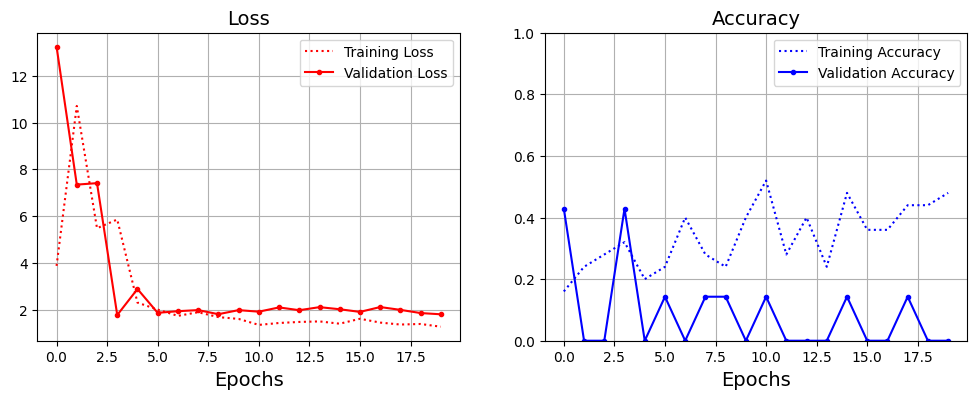

In [9]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=20, batch_size=32, verbose=1,
                    validation_data=(test_images, test_labels_onehot))

# Print train and test accuracy
print('\nTrain accuracy =', history.history['accuracy'][-1])
print('Test accuracy =', history.history['val_accuracy'][-1], '\n')

# Plot results
plot_results(history)